In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, os.path, sys

import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, RNN, LSTM, GRU
from tensorflow.keras.optimizers import SGD, Adam

from sklearn import preprocessing
from sklearn import metrics

In [69]:
path = r"podaci\0k\X"

In [70]:
dir = os.listdir(path)

In [71]:
file_names = []
for file in dir:
    file_names.append(file)

In [76]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [79]:
series = np.concatenate([pd.read_csv(path + "\\" + file, header=None).astype('int')
                              for file in file_names], axis=0)
series = scaler.fit_transform(series) 

In [80]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

In [81]:
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1931403, 10) Y.shape (1931403, 1)


In [82]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(learning_rate=0.1),
)

In [83]:
# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=10,
  validation_data=(X[-N//2:], Y[-N//2:]),
)


Epoch 1/10
30179/30179 [==============================] - 53s 2ms/step - loss: 9.0319e-04 - val_loss: 6.4610e-08
Epoch 2/10
30179/30179 [==============================] - 55s 2ms/step - loss: 7.8577e-04 - val_loss: 8.9980e-08
Epoch 3/10
30179/30179 [==============================] - 55s 2ms/step - loss: 7.7695e-04 - val_loss: 3.2085e-08
Epoch 4/10
30179/30179 [==============================] - 55s 2ms/step - loss: 7.5061e-04 - val_loss: 0.0011
Epoch 5/10
30179/30179 [==============================] - 54s 2ms/step - loss: 7.9777e-04 - val_loss: 2.5529e-09
Epoch 6/10
30179/30179 [==============================] - 54s 2ms/step - loss: 7.7000e-04 - val_loss: 1.1275e-09
Epoch 7/10
30179/30179 [==============================] - 54s 2ms/step - loss: 6.9202e-04 - val_loss: 1.4626e-05
Epoch 8/10
30179/30179 [==============================] - 54s 2ms/step - loss: 8.6763e-04 - val_loss: 0.0150
Epoch 9/10
30179/30179 [==============================] - 54s 2ms/step - loss: 7.9953e-04 - val_loss: 6.

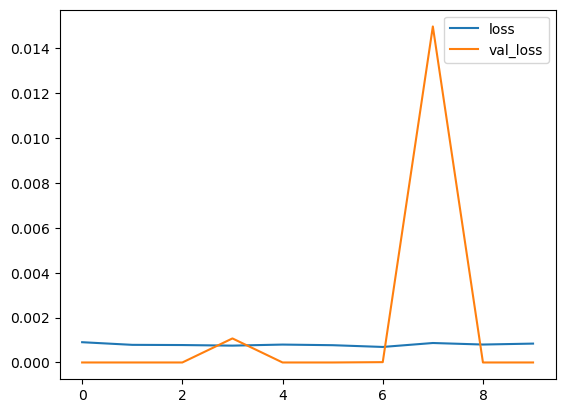

In [84]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [85]:
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step


KeyboardInterrupt: 

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [7]:
time_steps = 2

In [8]:
input_shape = (time_steps,1)

In [173]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [174]:
data_matrix = np.concatenate([pd.read_csv(path + "\\" + file, header=None).astype('int')
                              for file in file_names], axis=0)
data_matrix = scaler.fit_transform(data_matrix)  # Scale entire dataset

# Split data
train_idx = int(0.8 * len(data_matrix))
x_train, y_train = create_timeseries_split(data_matrix[:train_idx], time_steps)
x_test, y_test = create_timeseries_split(data_matrix[train_idx:], time_steps)

In [175]:
#scale the y back cuz
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

In [108]:
max_koord = pd.read_csv(r"C:\Users\mata2\Desktop\jupyter\Master rad\Matija_Grulovic\podaci\0k\X_max_koord_0k.txt", names=['x osa'])
min_koord = pd.read_csv(r"C:\Users\mata2\Desktop\jupyter\Master rad\Matija_Grulovic\podaci\0k\X_min_koord_0k.txt", names=['x osa'])

In [109]:
max_koord_scaled = scaler.transform(max_koord)
min_koord_scaled = scaler.transform(min_koord)

D:\Users\mata2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
D:\Users\mata2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [110]:
#plt.figure(figsize=(15,5))
#plt.plot(min_koord[8300:8500])
#plt.plot(max_koord[8300:8500])

In [189]:
Y_ind = np.arange(time_steps, len(min_koord), time_steps)
Y_ind

array([    2,     4,     6, ..., 60994, 60996, 60998])

In [224]:
num_correct = 0
for i in range(len(train_predict)):
    if train_predict[i][0] < y_train[i][0]+5:
        if train_predict[i][0] > y_train[i][0]-5:
            #print(np.round(y_train[i][0],2)-5, np.round(train_predict[i][0],2), np.round(y_train[i][0],2)+5)
            num_correct += 1

In [225]:
num_correct_test = 0
for i in range(len(test_predict)):
    if test_predict[i][0] < y_test[i][0]+5:
        if test_predict[i][0] > y_test[i][0]-5:
            #print(np.round(y_test[i][0],2)-5, np.round(test_predict[i][0],2), np.round(y_test[i][0],2)+5)
            num_correct_test += 1

In [217]:
for i in range(len(y_train)):
    print(np.round(y_train[i][0],2)-5, np.round(train_predict[i][0],2), np.round(y_train[i][0],2)+5)

-5.0 -1.85 5.0
-3.0 -1.85 7.0
0.0 -1.84 10.0
5.0 -1.64 15.0
13.0 -1.34 23.0
23.0 -0.84 33.0
32.0 -0.06 42.0
34.0 3.43 44.0
34.0 11.79 44.0
35.0 14.03 45.0
37.0 14.07 47.0
43.0 15.26 53.0
62.0 17.72 72.0
86.0 25.12 96.0
102.0 47.29 112.0
108.0 74.81 118.0
111.0 92.99 121.0
112.0 99.83 122.0
118.0 103.24 128.0
132.0 104.57 142.0
151.0 111.8 161.0
174.0 128.27 184.0
202.0 149.37 212.0
229.0 173.92 239.0
239.0 203.59 249.0
247.0 231.7 257.0
251.0 242.24 261.0
258.0 250.6 268.0
275.0 254.94 285.0
300.0 262.68 310.0
328.0 280.97 338.0
357.0 307.59 367.0
389.0 337.32 399.0
411.0 368.18 421.0
424.0 400.54 434.0
435.0 422.18 445.0
445.0 435.07 455.0
461.0 446.0 471.0
484.0 456.16 494.0
515.0 472.33 525.0
548.0 495.51 558.0
575.0 526.47 585.0
605.0 559.16 615.0
637.0 585.79 647.0
657.0 613.94 667.0
677.0 645.05 687.0
697.0 664.99 707.0
720.0 684.92 730.0
747.0 704.95 757.0
779.0 728.01 789.0
807.0 755.08 817.0
831.0 786.85 841.0
861.0 814.63 871.0
892.0 838.75 902.0
925.0 868.68 935.0
958.0 899.

9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985.02 10006.0
9996.0 9985

171946.0 171817.1 171956.0
171997.0 171865.2 172007.0
172049.0 171917.16 172059.0
172099.0 171968.19 172109.0
172148.0 172020.12 172158.0
172197.0 172070.08 172207.0
172246.0 172119.06 172256.0
172296.0 172168.08 172306.0
172349.0 172217.1 172359.0
172400.0 172267.19 172410.0
172450.0 172320.1 172460.0
172499.0 172371.08 172509.0
172548.0 172421.05 172558.0
172598.0 172470.05 172608.0
172649.0 172519.06 172659.0
172700.0 172569.1 172710.0
172750.0 172620.08 172760.0
172800.0 172671.05 172810.0
172850.0 172721.05 172860.0
172897.0 172771.05 172907.0
172948.0 172820.94 172958.0
172999.0 172868.06 173009.0
173052.0 172919.05 173062.0
173103.0 172970.1 173113.0
173152.0 173023.05 173162.0
173199.0 173073.95 173209.0
173248.0 173122.9 173258.0
173298.0 173169.94 173308.0
173350.0 173218.95 173360.0
173399.0 173269.05 173409.0
173450.0 173320.94 173460.0
173502.0 173369.98 173512.0
173553.0 173421.05 173563.0
173602.0 173472.95 173612.0
173653.0 173523.9 173663.0
173701.0 173572.95 173711.0


169994.0 169964.78 170004.0
169995.0 169964.77 170005.0
169994.0 169963.81 170004.0
169995.0 169964.77 170005.0
169994.0 169963.81 170004.0
169994.0 169964.77 170004.0
169994.0 169963.78 170004.0
169994.0 169963.78 170004.0
169995.0 169963.78 170005.0
169995.0 169963.81 170005.0
169995.0 169964.78 170005.0
169995.0 169964.78 170005.0
169994.0 169964.78 170004.0
169994.0 169964.77 170004.0
169994.0 169963.78 170004.0
169994.0 169963.78 170004.0
169994.0 169963.78 170004.0
169994.0 169963.78 170004.0
169995.0 169963.78 170005.0
169995.0 169963.81 170005.0
169995.0 169964.78 170005.0
169995.0 169964.78 170005.0
169994.0 169964.78 170004.0
169994.0 169964.77 170004.0
169994.0 169963.78 170004.0
169994.0 169963.78 170004.0
169994.0 169963.78 170004.0
169994.0 169963.78 170004.0
169994.0 169963.78 170004.0
169994.0 169963.78 170004.0
169995.0 169963.78 170005.0
169995.0 169963.81 170005.0
169995.0 169964.78 170005.0
169994.0 169964.78 170004.0
169994.0 169964.77 170004.0
169994.0 169963.78 1

-13.0 -2.78 -3.0
-13.0 -2.69 -3.0
-14.0 -2.61 -4.0
-14.0 -2.61 -4.0
-14.0 -2.7 -4.0
-14.0 -2.7 -4.0
-13.0 -2.7 -3.0
-14.0 -2.69 -4.0
-13.0 -2.61 -3.0
-13.0 -2.69 -3.0
-13.0 -2.61 -3.0
-13.0 -2.61 -3.0
-13.0 -2.61 -3.0
-13.0 -2.61 -3.0
-13.0 -2.61 -3.0
-13.0 -2.61 -3.0
-13.0 -2.61 -3.0
-13.0 -2.61 -3.0
-11.0 -2.61 -1.0
-7.0 -2.6 3.0
-5.0 -2.42 5.0
-6.0 -2.04 4.0
-7.0 -1.85 3.0
-9.0 -1.95 1.0
-8.0 -2.05 2.0
-7.0 -2.23 3.0
-6.0 -2.14 4.0
-6.0 -2.04 4.0
-7.0 -1.95 3.0
-8.0 -1.95 2.0
-8.0 -2.05 2.0
-7.0 -2.14 3.0
-6.0 -2.14 4.0
-6.0 -2.04 4.0
-7.0 -1.95 3.0
-7.0 -1.95 3.0
-8.0 -2.04 2.0
-7.0 -2.05 3.0
-7.0 -2.14 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -2.04 3.0
-7.0 -

164895.0 164767.0 164905.0
164945.0 164817.0 164955.0
164994.0 164867.0 165004.0
165043.0 164916.94 165053.0
165093.0 164965.94 165103.0
165144.0 165014.97 165154.0
165193.0 165064.98 165203.0
165244.0 165115.94 165254.0
165293.0 165165.0 165303.0
165344.0 165215.9 165354.0
165394.0 165264.97 165404.0
165445.0 165315.92 165455.0
165494.0 165365.97 165504.0
165544.0 165416.88 165554.0
165594.0 165465.9 165604.0
165645.0 165515.9 165655.0
165694.0 165565.94 165704.0
165744.0 165616.86 165754.0
165794.0 165665.89 165804.0
165844.0 165715.89 165854.0
165895.0 165765.86 165905.0
165944.0 165815.9 165954.0
165993.0 165866.83 166003.0
166042.0 165915.83 166052.0
166092.0 165964.81 166102.0
166143.0 166013.84 166153.0
166193.0 166063.88 166203.0
166243.0 166114.84 166253.0
166292.0 166164.81 166302.0
166343.0 166214.8 166353.0
166393.0 166263.84 166403.0
166444.0 166314.81 166454.0
166493.0 166364.83 166503.0
166543.0 166415.78 166553.0
166593.0 166464.78 166603.0
166644.0 166514.78 166654.0
1

56239.0 56321.9 56249.0
56188.0 56272.81 56198.0
56139.0 56220.85 56149.0
56090.0 56169.91 56100.0
56041.0 56120.92 56051.0
55990.0 56071.93 56000.0
55940.0 56022.87 55950.0
55890.0 55971.91 55900.0
55841.0 55921.92 55851.0
55791.0 55871.96 55801.0
55740.0 55822.92 55750.0
55689.0 55772.9 55699.0
55640.0 55721.9 55650.0
55591.0 55670.98 55601.0
55542.0 55621.98 55552.0
55491.0 55572.98 55501.0
55440.0 55523.93 55450.0
55390.0 55472.94 55400.0
55340.0 55421.98 55350.0
55291.0 55371.98 55301.0
55240.0 55322.02 55250.0
55188.0 55272.96 55198.0
55139.0 55221.94 55149.0
55090.0 55170.03 55100.0
55041.0 55121.04 55051.0
54990.0 55072.04 55000.0
54939.0 55022.99 54949.0
54890.0 54972.0 54900.0
54840.0 54921.06 54850.0
54791.0 54872.04 54801.0
54739.0 54822.08 54749.0
54688.0 54772.99 54698.0
54640.0 54721.02 54650.0
54590.0 54670.13 54600.0
54541.0 54622.07 54551.0
54489.0 54572.11 54499.0
54439.0 54523.02 54449.0
54389.0 54471.08 54399.0
54340.0 54421.1 54350.0
54289.0 54371.13 54299.0
54237

74938.0 75021.56 74948.0
74888.0 74969.56 74898.0
74839.0 74917.64 74849.0
74790.0 74867.66 74800.0
74740.0 74818.68 74750.0
74690.0 74769.65 74700.0
74640.0 74719.65 74650.0
74589.0 74669.66 74599.0
74539.0 74619.64 74549.0
74489.0 74568.68 74499.0
74439.0 74518.68 74449.0
74389.0 74468.68 74399.0
74340.0 74418.7 74350.0
74289.0 74368.72 74299.0
74237.0 74319.67 74247.0
74187.0 74268.65 74197.0
74138.0 74216.71 74148.0
74091.0 74166.76 74101.0
74042.0 74117.82 74052.0
73989.0 74070.76 73999.0
73938.0 74021.64 73948.0
73889.0 73968.71 73899.0
73839.0 73917.78 73849.0
73791.0 73868.76 73801.0
73740.0 73818.82 73750.0
73689.0 73770.74 73699.0
73639.0 73719.75 73649.0
73589.0 73668.78 73599.0
73539.0 73618.79 73549.0
73489.0 73568.8 73499.0
73439.0 73518.8 73449.0
73388.0 73468.8 73398.0
73339.0 73418.78 73349.0
73289.0 73367.85 73299.0
73237.0 73318.82 73247.0
73186.0 73268.76 73196.0
73138.0 73216.8 73148.0
73090.0 73165.9 73100.0
73040.0 73117.92 73050.0
72988.0 73069.86 72998.0
72937.

72790.0 72866.94 72800.0
72739.0 72818.92 72749.0
72688.0 72769.86 72698.0
72638.0 72718.86 72648.0
72588.0 72667.9 72598.0
72539.0 72617.9 72549.0
72488.0 72567.94 72498.0
72438.0 72518.89 72448.0
72389.0 72467.93 72399.0
72339.0 72417.96 72349.0
72288.0 72368.93 72298.0
72237.0 72318.92 72247.0
72186.0 72267.92 72196.0
72138.0 72216.92 72148.0
72090.0 72166.02 72100.0
72040.0 72118.03 72050.0
71989.0 72069.98 71999.0
71937.0 72019.94 71947.0
71887.0 71968.93 71897.0
71839.0 71916.98 71849.0
71790.0 71867.06 71800.0
71740.0 71819.04 71750.0
71689.0 71770.01 71699.0
71639.0 71719.98 71649.0
71589.0 71669.02 71599.0
71539.0 71619.02 71549.0
71489.0 71569.03 71499.0
71439.0 71519.04 71449.0
71389.0 71469.04 71399.0
71340.0 71419.06 71350.0
71289.0 71369.1 71299.0
71238.0 71320.03 71248.0
71187.0 71269.04 71197.0
71138.0 71218.06 71148.0
71090.0 71167.11 71100.0
71041.0 71118.15 71051.0
70989.0 71070.12 70999.0
70938.0 71021.03 70948.0
70888.0 70969.07 70898.0
70839.0 70918.11 70849.0
707

KeyboardInterrupt: 

In [190]:
for i in range(len(Y_ind)):
    print(min_koord['x osa'][Y_ind][2+2*i], train_predict[i], max_koord['x osa'][Y_ind][2+2*i])

-1 [-1.8475676] 1
2 [-1.8475676] 12
14 [-1.8404282] 31
25 [-1.6416923] 37
29 [-1.3418055] 39
40 [-0.84318614] 54
54 [-0.05538796] 74
69 [3.4281206] 108
91 [11.7864275] 116
115 [14.032848] 135
133 [14.067701] 158
181 [15.2606125] 207
227 [17.716148] 244
241 [25.117577] 256
257 [47.294983] 280
307 [74.80958] 333
375 [92.99] 394
414 [99.833824] 430
426 [103.23827] 451
472 [104.57061] 492
535 [111.79778] 553
602 [128.27104] 618
647 [149.36505] 662
685 [173.9227] 702
737 [203.59402] 752
801 [231.69652] 819
863 [242.24126] 883
923 [250.60085] 945
986 [254.93935] 996
1044 [262.68265] 1056
1102 [280.97064] 1125
1177 [307.58646] 1198
1258 [337.32123] 1268
1322 [368.18036] 1335
1385 [400.53915] 1406
1462 [422.17963] 1479
1550 [435.07245] 1573
1639 [446.0038] 1657
1713 [456.16074] 1724
1788 [472.32928] 1798
1876 [495.50607] 1899
1969 [526.46545] 1992
2065 [559.1642] 2090
2148 [585.7948] 2172
2241 [613.935] 2261
2335 [645.05145] 2355
2438 [664.9873] 2460
2545 [684.92316] 2569
2641 [704.9543] 2658


9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985

9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9984.993] 10003
9995 [9984.023] 10003
9995 [9984.056] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985

9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985

9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985

9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985.024] 10003
9995 [9985

1637 [9985.024] 1659
1714 [9985.024] 1737
1790 [9985.024] 1812
1872 [9985.024] 1900
1963 [9985.024] 1996
2062 [9985.024] 2094
2153 [9985.024] 2172
2239 [9985.024] 2263
2333 [9985.024] 2363
2438 [9985.024] 2460
2547 [9985.024] 2569
2641 [9985.024] 2661
2741 [9985.024] 2758
2843 [9985.024] 2864
2948 [9985.024] 2961
3044 [9985.024] 3064
3145 [9985.024] 3159
3246 [9985.024] 3260
3346 [9985.024] 3361
3444 [9985.024] 3457
3545 [9985.024] 3562
3647 [9985.024] 3661
3746 [9985.024] 3760
3846 [9985.024] 3858
3946 [9985.024] 3957
4045 [9985.024] 4058
4145 [9985.024] 4158
4245 [9985.024] 4256
4346 [9985.024] 4357
4447 [9985.024] 4457
4546 [9985.024] 4559
4647 [9985.024] 4659
4747 [9985.024] 4757
4847 [9985.024] 4858
4947 [9985.024] 4957
5046 [9985.024] 5059
5147 [9985.024] 5158
5246 [9985.024] 5257
5346 [9985.024] 5358
5447 [9985.024] 5458
5546 [9985.024] 5560
5648 [9985.024] 5660
5747 [9985.024] 5759
5848 [9985.024] 5860
5948 [9985.024] 5959
6046 [9985.024] 6061
6147 [9985.024] 6160
6247 [9985.02

37949 [9985.024] 37959
38048 [9985.024] 38057
38148 [9985.024] 38159
38248 [9985.024] 38256
38348 [9985.024] 38359
38450 [9985.024] 38459
38548 [9985.024] 38559
38648 [9985.024] 38660
38748 [9985.024] 38757
38848 [9985.024] 38857
38949 [9985.024] 38959
39047 [9985.024] 39057
39146 [9985.024] 39159
39247 [9985.024] 39255
39347 [9985.024] 39358
39447 [9985.024] 39460
39547 [9985.024] 39557
39647 [9985.024] 39660
39747 [9985.024] 39756
39847 [9985.024] 39859
39948 [9985.024] 39958
40046 [9985.024] 40056
40147 [9985.024] 40159
40245 [9985.024] 40254
40346 [9985.024] 40356
40447 [9985.024] 40459
40546 [9985.024] 40557
40646 [9985.024] 40655
40745 [9985.024] 40754
40846 [9985.024] 40857
40945 [9985.024] 40955
41044 [9985.024] 41055
41145 [9985.024] 41160
41244 [9985.024] 41254
41344 [9985.024] 41353
41445 [9985.024] 41457
41544 [9985.024] 41567
41645 [9985.024] 41659
41745 [9985.024] 41753
41844 [9985.024] 41861
41945 [9985.024] 41960
42044 [9985.024] 42053
42144 [9985.024] 42157
42244 [9985

75947 [9985.024] 75958
76047 [9985.024] 76060
76147 [9985.024] 76160
76246 [9985.024] 76258
76348 [9985.024] 76359
76448 [9985.024] 76457
76547 [9985.024] 76561
76648 [9985.024] 76660
76747 [9985.024] 76759
76847 [9985.024] 76859
76947 [9985.024] 76956
77046 [9985.024] 77060
77145 [9985.024] 77159
77245 [9985.024] 77255
77346 [9985.024] 77359
77446 [9985.024] 77460
77544 [9985.024] 77557
77646 [9985.024] 77662
77746 [9985.024] 77759
77845 [9985.024] 77858
77944 [9985.024] 77956
78042 [9985.024] 78056
78144 [9985.024] 78161
78243 [9985.024] 78256
78344 [9985.024] 78357
78445 [9985.024] 78457
78544 [9985.024] 78566
78646 [9985.024] 78661
78745 [9985.024] 78756
78846 [9985.024] 78859
78945 [9985.024] 78956
79043 [9985.024] 79058
79144 [9985.024] 79158
79244 [9985.024] 79255
79345 [9985.024] 79355
79445 [9985.024] 79457
79544 [9985.024] 79558
79645 [9985.024] 79658
79744 [9985.024] 79755
79845 [9985.024] 79857
79944 [9985.024] 79954
80044 [9985.024] 80056
80144 [9985.024] 80156
80243 [9985

113650 [9985.024] 113657
113749 [9985.024] 113757
113849 [9985.024] 113858
113949 [9985.024] 113955
114048 [9985.024] 114058
114150 [9985.024] 114157
114250 [9985.024] 114255
114350 [9985.024] 114359
114450 [9985.024] 114460
114550 [9985.024] 114559
114652 [9985.024] 114658
114750 [9985.024] 114758
114851 [9985.024] 114860
114949 [9985.024] 114956
115049 [9985.024] 115058
115151 [9985.024] 115159
115248 [9985.024] 115254
115349 [9985.024] 115359
115453 [9985.024] 115460
115551 [9985.024] 115558
115649 [9985.024] 115659
115751 [9985.024] 115759
115852 [9985.024] 115860
115946 [9985.024] 115956
116046 [9985.024] 116055
116149 [9985.024] 116161
116247 [9985.024] 116256
116347 [9985.024] 116355
116451 [9985.024] 116461
116548 [9985.024] 116560
116649 [9985.024] 116660
116748 [9985.024] 116757
116851 [9985.024] 116859
116950 [9985.024] 116958
117046 [9985.024] 117057
117146 [9985.024] 117159
117247 [9985.024] 117257
117348 [9985.024] 117355
117448 [9985.024] 117457
117546 [9985.024] 117557


148448 [9985.024] 148458
148547 [9985.024] 148559
148648 [9985.024] 148660
148748 [9985.024] 148758
148850 [9985.024] 148859
148948 [9985.024] 148957
149048 [9985.024] 149058
149148 [9985.024] 149158
149247 [9985.024] 149256
149348 [9985.024] 149358
149448 [9985.024] 149457
149547 [9985.024] 149559
149649 [9985.024] 149659
149747 [9985.024] 149757
149849 [9985.024] 149858
149948 [9985.024] 149957
150047 [9985.024] 150059
150147 [9985.024] 150158
150246 [9985.024] 150256
150347 [9985.024] 150359
150448 [9985.024] 150458
150547 [9985.024] 150560
150648 [9985.024] 150660
150747 [9985.024] 150758
150849 [9985.024] 150859
150948 [9985.024] 150958
151047 [9985.024] 151060
151147 [9985.024] 151159
151247 [9985.024] 151257
151348 [9985.024] 151358
151448 [9985.024] 151457
151547 [9985.024] 151560
151648 [9985.024] 151659
151747 [9985.024] 151756
151848 [9985.024] 151858
151947 [9985.024] 151957
152045 [9985.024] 152059
152147 [9985.024] 152158
152247 [9985.024] 152256
152348 [9985.024] 152359


179988 [9985.024] 180008
179991 [9985.024] 180009
179990 [9985.024] 180009
179990 [9985.024] 180009
179991 [9985.024] 180006
179984 [9985.024] 180006
179986 [9985.024] 180005
179990 [9985.024] 180006
179990 [9985.024] 180006
179988 [9985.024] 180005
179992 [9985.024] 180005
179990 [9985.024] 180005
179989 [9985.024] 180005
179991 [9985.024] 180005
179990 [9985.024] 180004
179989 [9985.024] 180004
179990 [9985.024] 180004
179990 [9985.024] 180004
179990 [9985.024] 180004
179990 [9985.024] 180004
179990 [9985.024] 180004
179990 [9985.024] 180004
179990 [9985.024] 180004
179990 [9985.024] 180004
179990 [9985.024] 180004
179992 [9985.024] 180004
179991 [9985.024] 180004
179991 [9985.024] 180004
179991 [9985.024] 180004
179993 [9985.024] 180004
179995 [9985.024] 180004
179994 [9985.024] 180004
179994 [9985.024] 180004
179995 [9985.024] 180004
179995 [9985.024] 180004
179994 [9985.024] 180004
179994 [9985.024] 180004
179994 [9985.024] 180004
179994 [9985.024] 180004
179994 [9985.024] 180004


169994 [72.88477] 170001
169994 [66.040985] 170002
169994 [62.4971] 170002
169994 [56.462837] 170002
169995 [42.42672] 170002
169994 [23.862888] 170001
169995 [5.0594773] 170002
169995 [0.67506033] 170002
169994 [-0.28624812] 170002
169995 [-0.29695657] 170002
169995 [-0.59684134] 170002
169995 [-1.0954614] 170002
169995 [-1.8796926] 170002
169994 [-2.710308] 170002
169994 [-3.053835] 170002
169994 [-3.0603485] 170002
169995 [-3.2483938] 170002
169995 [-3.6546714] 170002
169994 [-3.723651] 170002
169995 [-3.4843996] 170002
169995 [-3.3179896] 170002
169995 [-3.235366] 170002
169995 [-3.3245037] 170002
169994 [-3.4154193] 170002
169995 [-3.5680668] 170002
169995 [-3.487337] 170002
169994 [-3.406608] 170002
169994 [-3.3212466] 170002
169994 [-3.3245037] 170002
169995 [-3.4124825] 170002
169995 [-3.4902744] 170002
169995 [-3.487337] 170002
169995 [-3.4095457] 170002
169994 [-3.4066079] 170002
169994 [-3.3245037] 170002
169995 [-3.4095452] 170002
169995 [-3.4124825] 170002
169995 [-3.48146

169994 [6540.0264] 170002
169994 [6590.0522] 170002
169994 [6641.0146] 170002
169994 [6691.0083] 170002
169994 [6741.0024] 170002
169994 [6790.996] 170002
169994 [6840.9272] 170002
169994 [6888.985] 170002
169994 [6939.0425] 170002
169994 [6991.0044] 170002
169994 [7041.966] 170002
169994 [7091.96] 170002
169994 [7141.891] 170002
169994 [7189.917] 170002
169994 [7238.943] 170002
169994 [7288.936] 170002
169994 [7338.931] 170002
169994 [7388.9565] 170002
169994 [7439.9507] 170002
169994 [7490.9434] 170002
169994 [7541.906] 170002
169994 [7591.8687] 170002
169994 [7640.8945] 170002
169994 [7690.857] 170002
169994 [7739.9146] 170002
169994 [7790.844] 170002
169994 [7839.87] 170002
169994 [7889.8643] 170002
169994 [7939.89] 170002
169994 [7990.852] 170002
169994 [8040.8774] 170002
169994 [8091.8086] 170002
169994 [8140.8022] 170002
169994 [8189.7964] 170002
169994 [8238.8545] 170002
169994 [8289.848] 170002
169994 [8340.745] 170002
169994 [8388.835] 170002
169994 [8439.829] 170002
169994 [

169994 [23933.904] 170002
169994 [23982.898] 170002
169994 [24031.893] 170002
169994 [24080.951] 170002
169994 [24131.914] 170002
169994 [24181.906] 170002
169994 [24231.902] 170002
169994 [24281.895] 170002
169994 [24331.92] 170002
169994 [24382.88] 170002
169994 [24432.875] 170002
169994 [24482.871] 170002
169994 [24532.832] 170002
169994 [24581.89] 170002
169994 [24632.854] 170002
169994 [24682.846] 170002
169994 [24732.84] 170002
169994 [24782.834] 170002
169994 [24832.86] 170002
169994 [24883.791] 170002
169994 [24932.816] 170002
169994 [24982.777] 170002
169994 [25031.838] 170002
169994 [25082.799] 170002
169994 [25132.793] 170002
169994 [25182.754] 170002
169994 [25231.777] 170002
169994 [25281.742] 170002
169994 [25330.832] 170002
169994 [25382.762] 170002
169994 [25432.756] 170002
169994 [25482.719] 170002
169994 [25531.773] 170002
169994 [25582.736] 170002
169994 [25632.734] 170002
169994 [25682.727] 170002
169994 [25732.72] 170002
169994 [25782.715] 170002
169994 [25832.707]

169994 [41431.8] 170002
169994 [41480.797] 170002
169994 [41529.82] 170002
169994 [41579.848] 170002
169994 [41630.812] 170002
169994 [41680.805] 170002
169994 [41730.797] 170002
169994 [41780.793] 170002
169994 [41830.785] 170002
169994 [41880.78] 170002
169994 [41930.773] 170002
169994 [41980.734] 170002
169994 [42029.73] 170002
169994 [42078.785] 170002
169994 [42129.75] 170002
169994 [42179.773] 170002
169994 [42230.734] 170002
169994 [42280.734] 170002
169994 [42330.758] 170002
169994 [42381.72] 170002
169994 [42431.715] 170002
169994 [42481.707] 170002
169994 [42531.703] 170002
169994 [42581.69] 170002
169994 [42631.688] 170002
169994 [42681.688] 170002
169994 [42731.676] 170002
169994 [42781.664] 170002
169994 [42831.695] 170002
169994 [42882.66] 170002
169994 [42932.62] 170002
169994 [42981.617] 170002
169994 [43030.64] 170002
169994 [43080.668] 170002
169994 [43131.63] 170002
169994 [43181.594] 170002
169994 [43230.617] 170002
169994 [43280.61] 170002
169994 [43330.637] 170002

169994 [58728.75] 170002
169994 [58778.742] 170002
169994 [58828.773] 170002
169994 [58879.703] 170002
169994 [58928.695] 170002
169994 [58977.688] 170002
169994 [59026.72] 170002
169994 [59076.742] 170002
169994 [59127.703] 170002
169994 [59177.664] 170002
169994 [59226.688] 170002
169994 [59276.688] 170002
169994 [59326.71] 170002
169994 [59377.67] 170002
169994 [59427.664] 170002
169994 [59477.664] 170002
169994 [59527.625] 170002
169994 [59576.68] 170002
169994 [59627.64] 170002
169994 [59677.633] 170002
169994 [59727.633] 170002
169994 [59777.598] 170002
169994 [59826.65] 170002
169994 [59877.61] 170002
169994 [59927.58] 170002
169994 [59976.57] 170002
169994 [60025.594] 170002
169994 [60075.617] 170002
169994 [60126.586] 170002
169994 [60176.574] 170002
169994 [60226.566] 170002
169994 [60276.53] 170002
169994 [60325.62] 170002
169994 [60377.555] 170002
169994 [60427.55] 170002
169994 [60477.547] 170002
169994 [60527.5] 170002
169994 [60576.562] 170002
169994 [60627.523] 170002
1

169994 [75877.695] 170002
169994 [75927.68] 170002
169994 [75977.64] 170002
169994 [76026.63] 170002
169994 [76075.664] 170002
169994 [76125.66] 170002
169994 [76175.66] 170002
169994 [76225.65] 170002
169994 [76275.65] 170002
169994 [76325.664] 170002
169994 [76376.625] 170002
169994 [76426.625] 170002
169994 [76476.62] 170002
169994 [76526.58] 170002
169994 [76575.64] 170002
169994 [76626.6] 170002
169994 [76676.59] 170002
169994 [76726.586] 170002
169995 [76776.586] 170003
169994 [76826.61] 170001
169995 [76877.54] 170002
169994 [76926.57] 170002
169994 [76976.49] 170002
169995 [77024.586] 170002
169994 [77075.55] 170002
169994 [77125.54] 170002
169995 [77175.5] 170002
169994 [77224.52] 170002
169995 [77274.49] 170002
169994 [77323.586] 170002
169994 [77375.54] 170002
169995 [77426.47] 170002
169995 [77475.46] 170003
169994 [77524.49] 170002
169994 [77574.516] 170002
169994 [77625.48] 170002
169995 [77675.48] 170002
169994 [77725.44] 170002
169994 [77774.43] 170002
169994 [77823.484

179994 [93072.625] 180003
179994 [93122.62] 180003
179994 [93172.61] 180003
179994 [93222.57] 180003
179994 [93271.61] 180003
179994 [93321.664] 180003
179994 [93373.586] 180003
179994 [93423.57] 180003
179994 [93473.54] 180003
179994 [93522.53] 180003
179994 [93571.59] 180003
179994 [93622.555] 180003
179994 [93672.586] 180003
179994 [93723.54] 180003
179994 [93773.48] 180003
179994 [93821.59] 180003
179994 [93873.52] 180003
179994 [93923.5] 180003
179994 [93972.484] 180003
179978 [94021.48] 180001
179970 [94070.53] 179998
179964 [94121.46] 179982
179952 [94170.49] 179978
179938 [94220.49] 179975
179917 [94270.48] 179950
179892 [94320.5] 179938
179876 [94371.46] 179918
179864 [94421.43] 179888
179838 [94470.46] 179871
179791 [94520.445] 179830
179745 [94570.48] 179785
179738 [94621.4] 179765
179713 [94670.46] 179747
179663 [94721.42] 179706
179598 [94771.445] 179633
179560 [94822.445] 179586
179546 [94873.414] 179580
179501 [94923.4] 179537
179442 [94973.35] 179473
179382 [95022.37] 1

150746 [109672.625] 150754
150645 [109722.586] 150652
150546 [109771.586] 150552
150445 [109820.65] 150453
150345 [109871.63] 150352
150244 [109922.56] 150252
150143 [109971.555] 150150
150044 [110020.54] 150051
149944 [110069.65] 149951
149844 [110121.54] 149851
149745 [110170.57] 149752
149643 [110220.555] 149650
149544 [110270.586] 149551
149444 [110321.54] 149451
149343 [110371.57] 149350
149243 [110422.5] 149250
149141 [110471.52] 149149
149043 [110521.52] 149050
148943 [110571.51] 148949
148843 [110621.54] 148850
148744 [110672.51] 148751
148642 [110722.47] 148649
148543 [110771.49] 148549
148442 [110821.516] 148450
148343 [110872.484] 148349
148242 [110922.44] 148249
148141 [110971.445] 148148
148043 [111020.46] 148049
147940 [111070.49] 147948
147841 [111121.445] 147850
147744 [111171.445] 147749
147641 [111221.445] 147648
147541 [111271.43] 147549
147442 [111321.46] 147449
147342 [111372.414] 147348
147242 [111422.38] 147249
147140 [111471.41] 147147
147043 [111521.37] 147048


115542 [127265.44] 115554
115439 [127313.57] 115452
115340 [127365.54] 115353
115241 [127416.49] 115252
115139 [127466.45] 115152
115041 [127515.414] 115053
114939 [127563.51] 114952
114840 [127614.51] 114853
114741 [127665.46] 114752
114639 [127715.46] 114653
114541 [127765.45] 114553
114440 [127815.47] 114451
114338 [127866.445] 114353
114241 [127916.44] 114253
114141 [127966.37] 114153
114041 [128014.38] 114053
113941 [128063.44] 113953
113840 [128114.445] 113856
113744 [128165.37] 113754
113641 [128214.4] 113655
113542 [128264.42] 113556
113440 [128315.52] 113454
113342 [128369.57] 113355
113242 [128425.586] 113254
113141 [128482.46] 113154
113043 [128535.36] 113055
112941 [128585.125] 112954
112841 [128628.055] 112855
112743 [128669.47] 112755
112641 [128723.43] 112654
112541 [128776.35] 112554
112439 [128827.42] 112453
112340 [128880.26] 112353
112240 [128928.21] 112252
112139 [128975.15] 112152
112041 [129020.37] 112053
111939 [129072.35] 111952
111840 [129124.32] 111854
111742 

79843 [145125.31] 79853
79744 [145174.31] 79751
79643 [145223.36] 79652
79543 [145273.38] 79552
79442 [145324.33] 79451
79343 [145374.3] 79352
79242 [145423.44] 79250
79142 [145477.34] 79151
79044 [145528.28] 79052
78942 [145577.28] 78951
78843 [145626.22] 78853
78745 [145674.31] 78752
78643 [145725.28] 78652
78543 [145775.27] 78552
78443 [145825.25] 78451
78344 [145874.27] 78351
78241 [145924.31] 78249
78140 [145976.28] 78150
78043 [146027.28] 78050
77940 [146078.25] 77950
77842 [146128.12] 77850
77743 [146175.12] 77749
77642 [146222.25] 77650
77542 [146273.31] 77551
77440 [146326.25] 77449
77341 [146377.17] 77350
77241 [146426.14] 77248
77140 [146474.33] 77148
77040 [146528.28] 77050
76940 [146581.1] 76949
76841 [146628.06] 76850
76742 [146674.17] 76748
76641 [146724.22] 76649
76542 [146776.28] 76548
76439 [146830.08] 76448
76340 [146878.05] 76349
76240 [146925.17] 76247
76139 [146976.17] 76148
76042 [147028.22] 76048
75939 [147081.05] 75948
75841 [147128.98] 75849
75741 [147175.05] 

44040 [163022.28] 44051
43940 [163074.16] 43949
43840 [163123.11] 43850
43742 [163170.16] 43750
43640 [163219.19] 43649
43540 [163269.22] 43550
43442 [163321.22] 43449
43339 [163373.16] 43349
43241 [163423.12] 43249
43140 [163472.12] 43149
43040 [163521.11] 43051
42941 [163570.17] 42950
42842 [163621.16] 42851
42744 [163672.12] 42750
42642 [163722.1] 42651
42543 [163771.11] 42551
42441 [163821.03] 42451
42344 [163869.14] 42352
42243 [163920.12] 42251
42142 [163971.12] 42151
42043 [164022.12] 42052
41942 [164073.05] 41952
41844 [164122.02] 41854
41745 [164170.03] 41752
41643 [164219.06] 41653
41544 [164269.11] 41554
41444 [164321.03] 41452
41344 [164370.06] 41352
41243 [164421.06] 41251
41142 [164472.06] 41151
41044 [164523.] 41052
40942 [164572.03] 40952
40843 [164621.97] 40853
40745 [164671.] 40752
40643 [164721.] 40653
40544 [164771.02] 40552
40443 [164821.92] 40451
40343 [164869.98] 40352
40243 [164920.] 40250
40142 [164971.] 40150
40043 [165022.] 40051
39942 [165072.94] 39951
39843

5640 [179976.84] 5649
5541 [179984.61] 5548
5439 [179985.36] 5448
5339 [179978.27] 5347
5240 [179968.39] 5247
5139 [179962.62] 5147
5040 [179964.77] 5048
4938 [179970.78] 4946
4838 [179977.58] 4847
4740 [179977.48] 4748
4639 [179974.5] 4647
4540 [179972.53] 4547
4438 [179970.6] 4446
4338 [179970.66] 4346
4239 [179973.6] 4245
4137 [179973.62] 4146
4039 [179974.5] 4049
3937 [179972.58] 3946
3838 [179972.58] 3847
3741 [179972.58] 3747
3639 [179972.6] 3647
3540 [179973.56] 3546
3438 [179972.48] 3447
3338 [179969.28] 3347
3239 [179960.45] 3245
3138 [179956.67] 3146
3041 [179959.69] 3049
2939 [179962.61] 2946
2840 [179963.58] 2847
2742 [179963.52] 2748
2641 [179961.58] 2648
2541 [179961.55] 2548
2440 [179960.64] 2448
2340 [179962.56] 2348
2241 [179962.56] 2247
2140 [179962.56] 2148
2049 [179962.55] 2063
1965 [179961.58] 1974
1876 [179961.58] 1882
1782 [179961.61] 1792
1697 [179962.56] 1707
1627 [179962.55] 1644
1548 [179961.58] 1562
1461 [179961.61] 1468
1384 [179962.55] 1391
1311 [179961.58

8609 [169948.78] 8616
8673 [169948.78] 8688
8723 [169948.78] 8740
8803 [169948.78] 8818
8887 [169948.78] 8896
8948 [169948.78] 8962
9006 [169948.78] 9021
9066 [169948.78] 9089
9133 [169948.78] 9142
9189 [169948.78] 9199
9250 [169948.78] 9260
9307 [169948.78] 9325
9349 [169948.78] 9373
9391 [169948.78] 9411
9454 [169948.78] 9466
9510 [169948.78] 9522
9547 [169948.78] 9566
9550 [169948.81] 9579
9559 [169949.9] 9610
9634 [169953.81] 9673
9696 [169954.75] 9713
9707 [169953.75] 9737
9721 [169952.78] 9772
9749 [169952.78] 9801
9800 [169952.78] 9830
9825 [169952.81] 9854
9840 [169953.8] 9889
9869 [169953.75] 9924
9895 [169952.78] 9933
9920 [169952.78] 9942
9934 [169952.78] 9970
9955 [169952.78] 9999
9971 [169952.81] 10004
9983 [169953.75] 9997
9988 [169952.78] 10014
10005 [169952.81] 10033
10006 [169953.8] 10036
10000 [169953.75] 10030
10002 [169952.81] 10028
10005 [169953.75] 10031
10003 [169952.78] 10030
10002 [169952.78] 10029
10004 [169952.78] 10030
10004 [169952.78] 10030
10002 [169952.7

31947 [169963.78] 31956
32046 [169963.78] 32060
32147 [169963.78] 32157
32247 [169963.78] 32255
32347 [169963.78] 32358
32448 [169963.78] 32458
32548 [169963.78] 32559
32649 [169963.78] 32658
32749 [169963.78] 32757
32849 [169963.78] 32859
32949 [169963.78] 32957
33048 [169963.78] 33059
33149 [169963.78] 33158
33248 [169963.78] 33256
33350 [169963.78] 33358
33450 [169963.78] 33458
33549 [169963.78] 33560
33650 [169963.78] 33659
33749 [169963.78] 33757
33849 [169963.78] 33859
33948 [169963.78] 33957
34048 [169963.78] 34058
34148 [169963.78] 34158
34248 [169963.78] 34256
34348 [169963.78] 34358
34448 [169963.78] 34457
34548 [169963.78] 34560
34649 [169963.78] 34658
34749 [169963.78] 34757
34849 [169963.78] 34858
34949 [169963.78] 34957
35047 [169963.78] 35059
35148 [169963.78] 35157
35248 [169963.78] 35255
35348 [169963.78] 35358
35449 [169963.78] 35457
35547 [169963.78] 35559
35648 [169963.78] 35659
35749 [169963.78] 35756
35848 [169963.78] 35857
35948 [169963.78] 35956
36047 [169963.78

70446 [169963.78] 70456
70544 [169963.78] 70562
70646 [169963.78] 70657
70745 [169963.78] 70755
70846 [169963.78] 70856
70945 [169963.78] 70955
71044 [169963.78] 71057
71145 [169963.78] 71156
71244 [169963.78] 71254
71346 [169963.78] 71358
71446 [169963.78] 71458
71545 [169963.78] 71557
71646 [169963.78] 71657
71746 [169963.78] 71757
71847 [169963.78] 71858
71946 [169963.78] 71955
72045 [169963.78] 72059
72146 [169963.78] 72159
72245 [169963.78] 72255
72346 [169963.78] 72358
72447 [169963.78] 72458
72546 [169963.78] 72560
72647 [169963.78] 72657
72745 [169963.78] 72757
72847 [169963.78] 72858
72946 [169963.78] 72955
73045 [169963.78] 73059
73146 [169963.78] 73158
73245 [169963.78] 73255
73347 [169963.78] 73358
73447 [169963.81] 73459
73546 [169964.78] 73559
73647 [169964.75] 73658
73747 [169963.78] 73757
73848 [169963.78] 73859
73947 [169963.78] 73955
74046 [169963.78] 74060
74147 [169963.78] 74159
74247 [169963.78] 74257
74347 [169963.78] 74359
74449 [169963.78] 74458
74547 [169963.78

92546 [169963.78] 92559
92647 [169963.78] 92660
92746 [169963.78] 92757
92848 [169963.78] 92858
92947 [169963.78] 92957
93046 [169963.78] 93058
93146 [169963.78] 93158
93246 [169963.78] 93256
93348 [169963.78] 93358
93448 [169963.78] 93457
93547 [169963.78] 93559
93648 [169963.78] 93659
93747 [169963.78] 93756
93848 [169963.78] 93858
93946 [169963.78] 93955
94046 [169963.78] 94058
94146 [169963.78] 94156
94245 [169963.78] 94255
94346 [169963.78] 94356
94445 [169963.78] 94455
94545 [169963.78] 94558
94645 [169963.78] 94660
94745 [169963.78] 94755
94846 [169963.78] 94856
94945 [169963.78] 94956
95044 [169963.78] 95055
95145 [169963.78] 95158
95245 [169963.78] 95255
95346 [169963.78] 95357
95447 [169963.78] 95460
95547 [169963.78] 95555
95647 [169963.78] 95656
95745 [169963.78] 95757
95846 [169963.78] 95859
95946 [169963.78] 95956
96044 [169963.78] 96056
96145 [169963.78] 96158
96244 [169963.78] 96255
96346 [169963.78] 96358
96447 [169963.78] 96459
96546 [169963.78] 96556
96647 [169963.78

126844 [169963.78] 126860
126943 [169963.78] 126962
127043 [169963.78] 127055
127143 [169963.78] 127159
127243 [169963.78] 127260
127343 [169963.78] 127359
127444 [169963.78] 127455
127543 [169963.78] 127567
127644 [169963.78] 127661
127744 [169963.78] 127757
127843 [169963.78] 127860
127944 [169963.78] 127958
128042 [169963.78] 128056
128143 [169963.78] 128157
128242 [169963.78] 128254
128342 [169963.78] 128357
128446 [169963.78] 128457
128546 [169963.78] 128568
128644 [169963.78] 128660
128746 [169963.78] 128755
128845 [169963.78] 128861
128946 [169963.78] 128958
129044 [169963.78] 129056
129144 [169963.78] 129156
129244 [169963.78] 129258
129344 [169963.78] 129356
129446 [169963.78] 129455
129545 [169963.78] 129559
129644 [169963.78] 129659
129745 [169963.78] 129755
129844 [169963.78] 129857
129945 [169963.78] 129956
130043 [169963.78] 130056
130143 [169963.78] 130155
130243 [169963.78] 130254
130343 [169963.78] 130356
130444 [169963.78] 130457
130544 [169963.78] 130563
130643 [1699

162244 [169963.78] 162256
162346 [169963.78] 162357
162446 [169963.78] 162456
162545 [169963.78] 162558
162646 [169963.78] 162659
162746 [169963.78] 162756
162847 [169963.78] 162858
162946 [169963.78] 162957
163046 [169963.78] 163060
163146 [169963.78] 163158
163246 [169963.78] 163256
163347 [169963.78] 163358
163448 [169963.78] 163458
163547 [169963.78] 163560
163648 [169963.78] 163659
163747 [169963.78] 163758
163848 [169963.78] 163859
163948 [169963.78] 163958
164047 [169963.78] 164060
164147 [169963.78] 164159
164247 [169963.78] 164257
164348 [169963.78] 164359
164448 [169963.78] 164459
164547 [169963.78] 164561
164648 [169963.78] 164661
164747 [169963.78] 164758
164848 [169963.78] 164860
164947 [169963.78] 164958
165046 [169963.78] 165060
165147 [169963.78] 165160
165246 [169963.78] 165258
165347 [169963.78] 165359
165447 [169963.78] 165458
165546 [169963.78] 165560
165647 [169963.78] 165659
165746 [169963.78] 165758
165846 [169963.78] 165858
165946 [169963.78] 165957
166045 [1699

169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169995 [169963.78] 170004
169994 [169963.78] 170004
169994 [169963.78] 170004
169995 [169963.78] 170004
169995 [169963.78] 170004
169995 [169963.78] 170004
169994 [169963.78] 170004
169994 [1699

152142 [169963.78] 152152
152043 [169963.78] 152052
151943 [169963.78] 151954
151844 [169963.78] 151854
151744 [169963.78] 151755
151643 [169963.78] 151653
151540 [169963.78] 151553
151433 [169963.78] 151453
151343 [169963.78] 151353
151244 [169963.78] 151254
151137 [169963.78] 151152
151041 [169963.78] 151053
150943 [169963.78] 150953
150841 [169963.78] 150853
150740 [169963.78] 150755
150642 [169963.78] 150652
150542 [169963.78] 150553
150436 [169963.78] 150453
150339 [169963.78] 150352
150241 [169963.78] 150252
150137 [169963.78] 150150
150040 [169963.78] 150051
149938 [169963.78] 149950
149839 [169963.78] 149851
149740 [169963.78] 149751
149638 [169963.78] 149650
149540 [169963.78] 149551
149436 [169963.78] 149450
149338 [169963.78] 149350
149239 [169963.78] 149250
149137 [169963.78] 149149
149039 [169963.78] 149051
148937 [169963.78] 148949
148838 [169963.78] 148850
148739 [169963.78] 148750
148638 [169963.78] 148649
148539 [169963.78] 148550
148436 [169963.78] 148449
148337 [1699

116743 [169963.78] 116753
116640 [169963.78] 116653
116541 [169963.78] 116553
116439 [169963.78] 116452
116340 [169963.78] 116352
116241 [169963.78] 116252
116139 [169963.78] 116151
116041 [169963.78] 116052
115939 [169963.78] 115952
115840 [169963.78] 115854
115742 [169963.78] 115753
115640 [169963.78] 115653
115541 [169963.78] 115553
115439 [169963.78] 115452
115339 [169963.78] 115352
115241 [169963.78] 115252
115139 [169963.78] 115152
115041 [169963.78] 115052
114938 [169963.78] 114952
114839 [169963.78] 114853
114741 [169963.78] 114753
114639 [169963.78] 114651
114542 [169963.78] 114553
114440 [169963.78] 114453
114338 [169963.78] 114353
114241 [169963.78] 114253
114140 [169963.78] 114153
114040 [169963.78] 114054
113942 [169963.78] 113953
113841 [169963.78] 113855
113744 [169963.78] 113755
113641 [169963.78] 113655
113542 [169963.78] 113556
113431 [169963.78] 113454
113343 [169963.78] 113355
113243 [169963.78] 113255
113140 [169963.78] 113154
113039 [169963.78] 113055
112934 [1699

82542 [169963.78] 82551
82438 [169963.78] 82450
82340 [169963.78] 82350
82239 [169963.78] 82249
82139 [169963.78] 82150
82049 [169963.78] 82061
81966 [169963.78] 81975
81876 [169963.78] 81884
81783 [169963.78] 81790
81696 [169963.78] 81705
81628 [169963.78] 81643
81549 [169963.78] 81561
81461 [169963.78] 81468
81383 [169963.78] 81391
81310 [169963.78] 81325
81252 [169963.78] 81269
81179 [169963.78] 81191
81102 [169963.78] 81109
81036 [169963.78] 81047
80973 [169963.78] 80987
80910 [169963.78] 80930
80853 [169963.78] 80865
80797 [169963.78] 80806
80736 [169963.78] 80746
80673 [169963.78] 80690
80630 [169963.78] 80649
80584 [169963.78] 80604
80533 [169963.78] 80542
80478 [169963.78] 80490
80435 [169963.78] 80452
80407 [169963.78] 80447
80371 [169963.78] 80413
80324 [169963.78] 80344
80283 [169963.78] 80301
80251 [169963.78] 80287
80229 [169963.78] 80283
80197 [169963.78] 80258
80166 [169963.78] 80213
80142 [169963.78] 80173
80109 [169963.78] 80160
80069 [169963.78] 80135
80056 [169963.78

99130 [169963.78] 99145
99186 [169963.78] 99200
99235 [169963.78] 99256
99302 [169963.78] 99322
99357 [169963.78] 99382
99402 [169963.78] 99424
99447 [169963.78] 99462
99507 [169963.78] 99520
99552 [169963.78] 99576
99562 [169963.78] 99599
99549 [169963.78] 99622
99608 [169963.78] 99675
99693 [169963.78] 99731
99711 [169963.78] 99749
99707 [169963.78] 99745
99744 [169963.78] 99786
99798 [169963.78] 99842
99823 [169963.78] 99859
99827 [169963.78] 99868
99879 [169963.78] 99909
99878 [169963.78] 99938
99908 [169963.78] 99927
99921 [169963.78] 99949
99947 [169963.78] 99990
99970 [169963.78] 100012
99976 [169963.78] 100004
99982 [169963.78] 100003
99987 [169963.78] 100029
100011 [169963.78] 100042
99995 [169963.78] 100030
99993 [169963.78] 100029
100005 [169963.78] 100033
100004 [169963.78] 100032
99997 [169963.78] 100030
99987 [169963.78] 100033
99995 [169963.78] 100032
100003 [169963.78] 100031
99997 [169963.78] 100032
99995 [169963.78] 100030
99987 [169963.78] 100010
99991 [169963.78] 10

75242 [169963.78] 75248
75140 [169963.78] 75148
75042 [169963.78] 75049
74939 [169963.78] 74948
74841 [169963.78] 74850
74744 [169963.78] 74750
74641 [169963.78] 74650
74541 [169963.78] 74550
74441 [169963.78] 74449
74341 [169963.78] 74351
74242 [169963.78] 74250
74140 [169963.78] 74150
74043 [169963.78] 74051
73940 [169963.78] 73950
73842 [169963.78] 73851
73743 [169963.78] 73750
73642 [169963.78] 73650
73542 [169963.78] 73550
73440 [169963.78] 73449
73341 [169963.78] 73350
73242 [169963.78] 73249
73140 [169963.78] 73148
73042 [169963.78] 73049
72940 [169963.78] 72948
72841 [169963.78] 72850
72743 [169963.78] 72749
72640 [169963.78] 72649
72541 [169963.78] 72548
72440 [169963.78] 72448
72340 [169963.78] 72348
72241 [169963.78] 72248
72140 [169963.78] 72147
72042 [169963.78] 72048
71940 [169963.78] 71948
71840 [169963.78] 71850
71743 [169963.78] 71749
71641 [169963.78] 71648
71542 [169963.78] 71549
71440 [169963.78] 71448
71341 [169963.78] 71349
71242 [169963.78] 71248
71140 [169963.78

40044 [179970.6] 40052
39942 [179971.66] 39951
39843 [179973.6] 39852
39745 [179973.6] 39752
39643 [179973.56] 39652
39543 [179972.55] 39552
39444 [179971.6] 39451
39344 [179971.62] 39351
39244 [179972.6] 39252
39143 [179973.6] 39150
39043 [179973.56] 39051
38944 [179972.55] 38951
38844 [179971.6] 38852
38744 [179971.62] 38752
38643 [179972.58] 38651
38544 [179972.55] 38551
38443 [179971.5] 38451
38342 [179968.33] 38350
38242 [179960.53] 38251
38141 [179958.69] 38149
38043 [179961.64] 38050
37940 [179963.58] 37950
37841 [179963.58] 37850
37744 [179963.55] 37751
37642 [179962.55] 37650
37542 [179961.58] 37550
37442 [179961.61] 37449
37342 [179962.61] 37349
37241 [179963.55] 37249
37140 [179962.56] 37148
37043 [179962.56] 37049
36941 [179962.56] 36949
36841 [179962.56] 36850
36743 [179962.56] 36749
36641 [179962.56] 36650
36542 [179962.56] 36549
36440 [179962.56] 36449
36341 [179962.56] 36348
36241 [179962.56] 36248
36140 [179962.56] 36147
36042 [179962.61] 36049
35940 [179963.55] 35948


9994 [170254.14] 10001
9994 [170203.12] 10002
9994 [170152.22] 10001
9994 [170103.25] 10001
9994 [170055.19] 10001
9994 [170005.12] 10001
9994 [169953.16] 10001
9994 [169902.19] 10001
9994 [169852.28] 10001
9994 [169804.22] 10001
9994 [169754.22] 10001
9994 [169704.19] 10001
9994 [169653.25] 10001
9994 [169603.25] 10001
9994 [169554.25] 10001
9994 [169504.22] 10001
9994 [169453.19] 10001
9994 [169401.3] 10001
9994 [169352.31] 10001
9994 [169303.28] 10001
9994 [169253.28] 10001
9994 [169203.25] 10001
9994 [169152.31] 10001
9994 [169103.34] 10001
9994 [169054.31] 10001
9994 [169004.25] 10001
9994 [168952.28] 10001
9994 [168901.36] 10001
9994 [168852.34] 10001
9994 [168803.38] 10001
9994 [168754.31] 10001
9994 [168703.31] 10001
9994 [168652.38] 10001
9994 [168603.39] 10001
9994 [168554.39] 10001
9994 [168505.28] 10001
9994 [168452.34] 10001
9994 [168401.4] 10001
9994 [168352.4] 10001
9994 [168303.38] 10001
9994 [168252.4] 10001
9994 [168202.4] 10001
9994 [168152.45] 10001
9994 [168103.44]

13846 [150462.5] 13857
13945 [150411.56] 13957
14044 [150361.53] 14058
14144 [150311.56] 14156
14244 [150261.5] 14256
14346 [150209.58] 14357
14446 [150159.56] 14457
14545 [150109.62] 14563
14645 [150060.66] 14658
14745 [150012.53] 14757
14846 [149960.6] 14861
14945 [149910.61] 14958
15045 [149860.64] 15058
15145 [149811.61] 15157
15245 [149761.6] 15258
15345 [149710.6] 15357
15446 [149659.64] 15458
15545 [149609.67] 15560
15646 [149560.67] 15658
15745 [149511.62] 15758
15846 [149460.62] 15858
15945 [149409.66] 15957
16044 [149359.69] 16057
16145 [149309.7] 16157
16244 [149260.62] 16256
16346 [149208.69] 16357
16446 [149158.72] 16458
16546 [149109.72] 16559
16647 [149060.73] 16659
16746 [149011.66] 16758
16847 [148959.69] 16858
16946 [148908.72] 16958
17046 [148858.78] 17058
17146 [148810.78] 17158
17246 [148761.72] 17257
17347 [148710.72] 17358
17447 [148659.72] 17457
17547 [148608.78] 17560
17648 [148559.8] 17659
17747 [148510.75] 17757
17847 [148459.78] 17858
17946 [148409.8] 17956


49145 [132810.72] 49160
49246 [132762.62] 49257
49345 [132711.61] 49357
49447 [132659.67] 49459
49545 [132609.75] 49557
49647 [132561.69] 49659
49747 [132511.62] 49756
49846 [132459.67] 49856
49946 [132408.75] 49955
50044 [132359.72] 50056
50146 [132309.75] 50159
50245 [132260.67] 50256
50344 [132208.75] 50355
50447 [132158.78] 50456
50544 [132109.81] 50556
50646 [132061.75] 50658
50745 [132011.69] 50753
50845 [131959.72] 50856
50946 [131908.81] 50955
51044 [131859.84] 51053
51144 [131811.81] 51153
51244 [131762.75] 51252
51343 [131711.72] 51354
51445 [131659.83] 51453
51545 [131610.83] 51553
51644 [131561.81] 51653
51744 [131511.8] 51753
51844 [131460.81] 51854
51944 [131410.83] 51952
52043 [131360.86] 52052
52142 [131311.83] 52152
52243 [131261.8] 52251
52342 [131209.86] 52354
52445 [131159.88] 52453
52544 [131110.94] 52567
52646 [131062.88] 52654
52745 [131012.83] 52753
52846 [130960.86] 52858
52946 [130909.9] 52960
53045 [130859.96] 53054
53145 [130811.98] 53156
53245 [130763.88] 5

84146 [115316.805] 84161
84246 [115267.72] 84257
84348 [115215.78] 84360
84448 [115165.79] 84459
84548 [115115.82] 84560
84648 [115066.836] 84662
84749 [115017.77] 84759
84849 [114966.81] 84863
84948 [114916.82] 84958
85047 [114866.85] 85062
85148 [114817.86] 85160
85248 [114768.805] 85260
85348 [114717.805] 85360
85448 [114666.85] 85458
85548 [114616.88] 85561
85650 [114567.89] 85661
85749 [114518.83] 85758
85849 [114467.84] 85861
85948 [114416.914] 85960
86047 [114367.88] 86060
86149 [114317.92] 86160
86248 [114268.87] 86259
86349 [114217.87] 86361
86450 [114166.945] 86460
86548 [114117.945] 86562
86650 [114068.95] 86661
86749 [114019.87] 86759
86850 [113967.94] 86860
86949 [113917.98] 86958
87048 [113868.98] 87062
87148 [113819.95] 87160
87248 [113769.9] 87258
87348 [113717.96] 87360
87449 [113667.99] 87457
87547 [113619.] 87559
87647 [113569.984] 87662
87747 [113519.96] 87757
87847 [113469.] 87859
87947 [113419.01] 87957
88045 [113369.01] 88059
88147 [113319.05] 88160
88247 [113269

94539 [98418.836] 94555
94441 [98369.805] 94454
94338 [98319.82] 94355
94240 [98269.76] 94253
94137 [98217.836] 94154
94041 [98167.86] 94054
93938 [98118.875] 93954
93839 [98069.88] 93856
93742 [98020.76] 93754
93640 [97967.85] 93655
93541 [97917.87] 93555
93439 [97867.9] 93454
93339 [97818.875] 93355
93241 [97768.85] 93253
93139 [97717.85] 93154
93041 [97666.9] 93056
92940 [97616.93] 92955
92840 [97567.9] 92856
92742 [97517.88] 92754
92640 [97466.9] 92655
92541 [97415.95] 92556
92439 [97366.93] 92454
92339 [97316.93] 92355
92240 [97266.875] 92253
92139 [97214.92] 92154
92040 [97163.984] 92055
91939 [97115.03] 91955
91840 [97067.03] 91857
91742 [97018.945] 91755
91641 [96967.914] 91656
91541 [96915.945] 91554
91434 [96865.03] 91452
91340 [96816.086] 91353
91242 [96769.] 91252
91136 [96719.01] 91152
91040 [96668.95] 91054
90941 [96616.96] 90952
90841 [96565.03] 90853
90741 [96515.07] 90754
90642 [96466.07] 90652
90543 [96417.11] 90553
90436 [96369.02] 90454
90340 [96317.984] 90352
90242

55342 [78821.19] 55350
55243 [78772.13] 55250
55140 [78721.14] 55148
55043 [78670.18] 55049
54940 [78620.21] 54950
54841 [78571.19] 54850
54744 [78521.164] 54752
54641 [78470.17] 54650
54544 [78419.24] 54551
54441 [78370.22] 54450
54341 [78320.23] 54349
54243 [78270.195] 54250
54139 [78219.2] 54148
54042 [78168.234] 54051
53940 [78118.27] 53950
53842 [78069.28] 53851
53744 [78020.195] 53752
53641 [77968.23] 53651
53543 [77917.336] 53551
53440 [77869.305] 53451
53342 [77820.27] 53350
53243 [77770.23] 53251
53140 [77718.26] 53149
53043 [77667.336] 53050
52940 [77618.336] 52950
52843 [77569.31] 52852
52744 [77519.32] 52751
52642 [77469.26] 52651
52543 [77417.36] 52551
52442 [77368.336] 52451
52342 [77318.37] 52350
52243 [77269.29] 52250
52141 [77217.35] 52149
52043 [77167.35] 52050
51941 [77117.43] 51949
51842 [77069.4] 51851
51745 [77020.32] 51751
51642 [76968.35] 51651
51543 [76917.39] 51551
51443 [76867.42] 51451
51342 [76818.43] 51350
51242 [76769.4] 51251
51141 [76719.38] 51150
51043

19941 [61121.29] 19949
19842 [61071.36] 19851
19743 [61023.273] 19750
19642 [60972.273] 19650
19541 [60921.344] 19550
19441 [60872.35] 19449
19341 [60823.33] 19348
19242 [60773.33] 19249
19141 [60723.266] 19148
19041 [60671.375] 19048
18939 [60622.38] 18949
18840 [60573.36] 18849
18742 [60523.33] 18749
18640 [60472.336] 18648
18542 [60421.406] 18548
18439 [60372.406] 18448
18339 [60323.387] 18349
18241 [60273.36] 18248
18139 [60222.367] 18147
18041 [60171.402] 18048
17939 [60121.473] 17948
17840 [60073.41] 17849
17742 [60023.39] 17748
17641 [59972.42] 17649
17542 [59922.434] 17549
17440 [59872.473] 17449
17340 [59823.445] 17349
17241 [59773.414] 17248
17140 [59722.453] 17148
17041 [59672.465] 17048
16940 [59622.5] 16948
16840 [59573.508] 16849
16742 [59524.453] 16749
16641 [59473.453] 16648
16541 [59422.492] 16548
16439 [59372.53] 16448
16340 [59323.508] 16348
16241 [59273.477] 16247
16139 [59222.484] 16147
16040 [59171.555] 16048
15939 [59122.53] 15947
15841 [59072.562] 15849
15742 [5

-11 [41224.65] 4
-8 [41173.723] 4
-10 [41124.695] 4
-10 [41074.766] 4
-9 [41026.65] 4
-9 [40974.715] 4
-9 [40924.72] 4
-9 [40874.758] 4
-9 [40825.73] 4
-9 [40775.703] 4
-6 [40724.71] 4
-6 [40673.75] 4
-6 [40623.79] 4
-6 [40574.79] 4
-6 [40525.734] 4
-6 [40474.746] 4
-6 [40423.777] 4
-6 [40373.78] 4
-6 [40323.82] 4
-6 [40274.766] 4
-6 [40223.77] 4
-6 [40172.84] 4
-6 [40123.844] 4
-6 [40074.85] 4
-6 [40025.76] 4
-6 [39973.863] 4
-6 [39924.84] 4
-6 [39874.875] 4
-6 [39825.85] 4
-6 [39775.83] 4
-6 [39724.832] 4
-4 [39673.902] 7
0 [39624.875] 23
14 [39574.914] 35
26 [39525.85] 39
32 [39474.86] 51
37 [39423.93] 64
55 [39374.906] 101
79 [39324.914] 117
105 [39274.887] 127
118 [39223.89] 151
165 [39172.96] 213
219 [39123.97] 243
228 [39074.973] 252
248 [39025.914] 277
289 [38974.953] 331
369 [38924.96] 393
401 [38874.965] 427
413 [38825.008] 450
458 [38775.945] 493
526 [38724.95] 551
591 [38673.99] 609
634 [38623.992] 660
668 [38574.03] 702
730 [38524.977] 752
790 [38473.98] 810
870 [38423.02]

35247 [21027.047] 35255
35349 [20975.086] 35357
35449 [20924.121] 35457
35548 [20874.162] 35558
35649 [20825.197] 35657
35749 [20777.11] 35757
35849 [20726.113] 35857
35949 [20675.152] 35954
36047 [20625.156] 36056
36148 [20575.195] 36157
36248 [20526.14] 36254
36348 [20475.176] 36356
36448 [20425.184] 36457
36548 [20375.188] 36557
36649 [20325.195] 36657
36748 [20275.168] 36756
36849 [20224.176] 36857
36948 [20173.244] 36954
37048 [20124.283] 37057
37148 [20076.225] 37156
37247 [20026.168] 37253
37349 [19974.236] 37357
37448 [19924.242] 37457
37548 [19874.281] 37556
37650 [19825.285] 37656
37749 [19776.262] 37757
37849 [19726.234] 37858
37948 [19675.273] 37954
38049 [19625.28] 38054
38150 [19575.316] 38159
38248 [19526.26] 38253
38348 [19475.266] 38354
38450 [19424.305] 38459
38548 [19374.342] 38557
38649 [19325.281] 38655
38747 [19274.29] 38755
38847 [19223.295] 38859
38946 [19172.395] 38958
39046 [19124.371] 39057
39146 [19075.377] 39158
39246 [19026.287] 39257
39347 [18974.324] 393

71945 [2676.316] 71959
72043 [2626.322] 72058
72145 [2578.0747] 72159
72245 [2531.2532] 72257
72346 [2484.4314] 72358
72445 [2437.6096] 72457
72545 [2390.6245] 72560
72646 [2340.796] 72660
72745 [2290.904] 72757
72846 [2239.1458] 72858
72945 [2189.3806] 72956
73046 [2141.704] 73059
73145 [2098.9148] 73160
73245 [2057.992] 73258
73346 [2015.0759] 73360
73446 [1970.1985] 73456
73545 [1924.3243] 73561
73647 [1877.5172] 73660
73747 [1831.675] 73757
73847 [1785.9281] 73859
73947 [1743.1392] 73956
74046 [1702.5455] 74060
74147 [1668.6577] 74159
74247 [1634.0212] 74258
74348 [1595.9845] 74360
74448 [1552.9954] 74459
74547 [1506.2413] 74561
74648 [1462.4779] 74662
74748 [1421.7999] 74759
74848 [1386.8804] 74861
74948 [1351.0593] 74958
75048 [1317.3589] 75060
75148 [1289.3218] 75159
75248 [1257.3292] 75258
75349 [1222.3145] 75360
75449 [1183.4396] 75459
75548 [1144.5647] 75560
75649 [1105.8802] 75661
75748 [1073.0497] 75758
75849 [1042.1173] 75860
75947 [1010.28357] 75959
76046 [980.3797] 76059

81043 [-2.04273] 81052
80939 [-2.04273] 80951
80840 [-2.04273] 80852
80741 [-2.04273] 80752
80641 [-2.04273] 80651
80542 [-2.04273] 80552
80439 [-2.0427322] 80451
80340 [-2.0427322] 80351
80239 [-2.04273] 80250
80139 [-2.04273] 80150
80041 [-2.04273] 80051
79939 [-2.04273] 79951
79841 [-2.04273] 79852
79743 [-2.04273] 79752
79640 [-2.04273] 79651
79540 [-2.04273] 79552
79440 [-2.04273] 79452
79340 [-2.04273] 79351
79240 [-2.04273] 79251
79139 [-2.04273] 79150
79042 [-2.04273] 79052
78938 [-2.04273] 78950
78840 [-2.04273] 78852
78742 [-2.04273] 78752
78640 [-2.04273] 78652
78543 [-2.04273] 78552
78437 [-2.04273] 78451
78339 [-2.04273] 78351
78241 [-2.04273] 78250
78138 [-2.04273] 78148
78041 [-2.04273] 78049
77936 [-2.04273] 77949
77839 [-2.04273] 77851
77740 [-2.04273] 77750
77638 [-2.04273] 77650
77541 [-2.04273] 77550
77436 [-2.04273] 77450
77337 [-2.04273] 77350
77239 [-2.0427322] 77248
77138 [-2.0427322] 77148
77039 [-2.04273] 77050
76936 [-2.04273] 76948
76838 [-2.04273] 76850
767

41544 [1843.8188] 41552
41444 [1897.4751] 41452
41343 [1946.3706] 41352
41243 [1997.1958] 41252
41143 [2047.6396] 41151
41044 [2086.6013] 41052
40942 [2128.4573] 40951
40843 [2170.3132] 40852
40745 [2212.328] 40752
40643 [2259.2622] 40652
40543 [2308.9954] 40552
40443 [2355.7075] 40451
40343 [2398.518] 40351
40243 [2441.7527] 40251
40141 [2489.6694] 40151
40043 [2542.205] 40052
39942 [2597.1055] 39951
39842 [2644.368] 39853
39744 [2690.3938] 39752
39642 [2737.4517] 39653
39544 [2786.5095] 39553
39443 [2837.5671] 39452
39343 [2890.5286] 39352
39243 [2942.3955] 39251
39142 [2990.3577] 39152
39043 [3037.4158] 39053
38941 [3086.4417] 38952
38842 [3136.467] 38853
38744 [3187.4612] 38752
38642 [3238.455] 38653
38543 [3289.4172] 38553
38442 [3339.3796] 38451
38342 [3388.3735] 38351
38240 [3437.3677] 38250
38141 [3486.4253] 38150
38043 [3537.419] 38050
37940 [3588.4128] 37950
37841 [3639.3435] 37852
37743 [3688.3694] 37751
37641 [3738.3313] 37651
37542 [3787.3574] 37550
37440 [3837.383] 37449


1785 [10233.312] 1792
1697 [10243.755] 1706
1629 [10267.879] 1638
1549 [10296.003] 1557
1461 [10328.095] 1468
1383 [10363.026] 1390
1312 [10395.198] 1321
1255 [10402.197] 1270
1181 [10409.323] 1191
1104 [10420.448] 1110
1039 [10435.827] 1046
976 [10462.95] 989
913 [10494.042] 931
854 [10528.007] 866
798 [10561.099] 807
738 [10596.872] 748
676 [10625.519] 692
630 [10643.421] 649
588 [10658.451] 601
536 [10674.608] 545
480 [10695.955] 493
437 [10728.142] 452
413 [10765.915] 445
375 [10796.815] 442
327 [10824.844] 365
285 [10853.903] 301
254 [10884.806] 291
230 [10912.865] 284
199 [10942.893] 243
167 [10973.891] 190
145 [11004.822] 175
110 [11033.851] 156
81 [11063.848] 124
68 [11093.907] 94
62 [11126.095] 85
28 [11164.217] 64
6 [11206.212] 39
-4 [11247.856] 28
1 [11278.885] 18
-17 [11310.912] 8
-29 [11343.876] -7
-31 [11376.001] -3
-30 [11412.122] -2
-26 [11452.309] -4
-26 [11498.462] -3
-28 [11549.487] -3
-28 [11601.005] -4
-25 [11637.905] -3
-27 [11671.837] -3
-28 [11703.866] -4
-26 [1

25846 [29235.234] 25856
25946 [29283.36] 25955
26045 [29335.383] 26055
26145 [29388.248] 26156
26246 [29437.242] 26255
26345 [29486.27] 26357
26446 [29536.23] 26455
26546 [29585.258] 26559
26647 [29635.316] 26657
26747 [29687.246] 26757
26847 [29737.242] 26858
26946 [29787.2] 26955
27047 [29836.162] 27058
27147 [29884.16] 27158
27246 [29932.217] 27256
27347 [29982.307] 27360
27449 [30035.297] 27457
27549 [30088.133] 27561
27650 [30136.125] 27659
27750 [30184.154] 27759
27849 [30233.148] 27859
27947 [30282.27] 27958
28047 [30335.23] 28059
28149 [30387.191] 28159
28248 [30438.121] 28256
28348 [30487.086] 28360
28450 [30535.14] 28458
28550 [30585.139] 28561
28650 [30635.102] 28660
28749 [30684.156] 28758
28849 [30735.121] 28860
28949 [30785.145] 28956
29049 [30836.172] 29061
29149 [30888.035] 29159
29249 [30936.06] 29258
29348 [30985.057] 29360
29451 [31034.113] 29457
29550 [31085.078] 29562
29651 [31135.102] 29661
29750 [31186.033] 29758
29850 [31235.027] 29860
29948 [31284.055] 29957
30

27940 [46581.242] 27951
27841 [46632.203] 27850
27743 [46682.2] 27751
27641 [46732.19] 27650
27542 [46782.188] 27551
27440 [46832.215] 27450
27340 [46883.145] 27349
27240 [46932.17] 27249
27139 [46982.133] 27148
27040 [47031.188] 27048
26938 [47082.152] 26949
26839 [47132.117] 26848
26740 [47181.137] 26749
26639 [47231.133] 26647
26540 [47281.133] 26548
26437 [47331.188] 26447
26338 [47383.117] 26347
26239 [47433.08] 26247
26138 [47482.1] 26146
26039 [47532.07] 26049
25938 [47581.125] 25947
25839 [47632.086] 25848
25740 [47682.113] 25747
25639 [47733.04] 25647
25539 [47782.07] 25548
25437 [47832.066] 25447
25337 [47882.06] 25347
25239 [47932.047] 25247
25137 [47981.98] 25145
25040 [48030.04] 25050
24937 [48080.062] 24949
24838 [48131.055] 24847
24740 [48181.992] 24748
24638 [48231.01] 24651
24539 [48281.008] 24547
24439 [48331.035] 24447
24338 [48381.996] 24349
24239 [48431.96] 24247
24138 [48480.984] 24145
24040 [48530.977] 24051
23937 [48581.004] 23947
23840 [48631.965] 23848
23742 [

-6 [66777.79] 0
-6 [66827.77] 0
-5 [66877.805] 1
-5 [66928.73] 0
-6 [66977.695] 0
-6 [67025.76] 0
-5 [67075.75] 0
-5 [67125.74] 1
-5 [67175.74] 0
-6 [67225.73] 0
-6 [67275.75] 0
-5 [67326.71] 1
-5 [67376.71] 1
-6 [67426.67] 0
-6 [67475.695] 0
-6 [67525.695] 0
-5 [67575.71] 1
-5 [67626.68] 1
-6 [67676.68] 0
-6 [67726.664] 0
-6 [67776.664] 0
-5 [67826.73] 0
-5 [67878.65] 0
-6 [67928.65] 0
-6 [67978.61] 0
-6 [68027.6] 0
-5 [68076.59] 0
-5 [68125.625] 0
-5 [68175.586] 0
-6 [68224.62] 0
-6 [68274.63] 0
-6 [68325.63] 0
-6 [68376.59] 0
-6 [68426.555] 0
-6 [68475.62] 0
-6 [68526.58] 0
-5 [68576.57] 0
-5 [68626.57] 0
-6 [68676.555] 0
-6 [68726.586] 0
-6 [68777.54] 0
-6 [68827.54] 0
-6 [68877.5] 0
-6 [68926.49] 0
-6 [68975.52] 0
-6 [69025.516] 0
-6 [69075.51] 0
-6 [69125.49] 0
-6 [69175.49] 0
-6 [69225.45] 0
-6 [69274.52] 0
-6 [69325.51] 0
-6 [69376.48] 0
-6 [69426.43] 0
-6 [69475.46] 0
-6 [69525.45] 0
-6 [69575.445] 0
-6 [69625.445] 0
-6 [69675.47] 0
-6 [69726.4] 0
-6 [69775.42] 0
-6 [69825.45]

-5 [81732.67] 0
-5 [81772.73] 0
-5 [81814.76] 0
-5 [81857.78] 0
-5 [81901.99] 0
-5 [81952.93] 0
-5 [82001.734] 0
-5 [82044.695] 0
-5 [82086.73] 0
-5 [82129.805] 0
-5 [82175.74] 0
-5 [82219.836] 0
-5 [82266.79] 0
-5 [82312.914] 0
-5 [82363.07] 0
-5 [82418.03] 0
-5 [82471.96] 0
-5 [82523.89] 0
-5 [82573.83] 0
-5 [82621.76] 0
-5 [82667.85] 0
-5 [82716.96] 0
-5 [82769.96] 0
-5 [82822.914] 0
-5 [82874.98] 0
-5 [82929.02] 0
-5 [82984.87] 0
-5 [83035.8] 0
-5 [83084.63] 0
-5 [83128.586] 0
-5 [83171.94] 0
-5 [83225.97] 0
-5 [83280.87] 0
-5 [83332.8] 0
-5 [83382.68] 0
-5 [83429.68] 0
-5 [83476.77] 0
-5 [83526.74] 0
-5 [83575.86] 0
-5 [83628.82] 0
-5 [83680.75] 0
-5 [83730.69] 0
-5 [83778.68] 0
-5 [83826.71] 0
-5 [83875.73] 0
-5 [83925.82] 0
-5 [83978.78] 0
-5 [84030.77] 0
-5 [84082.7] 0
-5 [84132.6] 0
-5 [84179.57] 0
-5 [84225.69] 0
-5 [84275.805] 0
-5 [84329.805] 0
-5 [84383.64] 0
-5 [84432.625] 0
-5 [84481.59] 0
-5 [84529.62] 0
-5 [84578.7] 0
-5 [84630.664] 0
-5 [84681.63] 0
-5 [84731.63] 0
-5

-5 [106627.02] 0
-5 [106677.98] 0
-5 [106728.01] 0
-5 [106779.03] 0
-5 [106830.87] 0
-5 [106877.836] 0
-5 [106923.99] 0
-5 [106975.1] 0
-5 [107030.04] 0
-5 [107082.85] 0
-5 [107129.836] 0
-5 [107176.86] 0
-5 [107224.945] 0
-5 [107276.01] 0
-5 [107329.01] 0
-5 [107381.9] 0
-5 [107431.86] 0
-5 [107480.836] 0
-5 [107528.86] 0
-5 [107577.9] 0
-5 [107628.914] 0
-5 [107679.9] 0
-5 [107730.87] 0
-5 [107780.81] 0
-5 [107829.78] 0
-5 [107877.77] 0
-5 [107925.87] 0
-5 [107976.95] 0
-5 [108030.914] 0
-5 [108083.75] 0
-5 [108131.68] 0
-5 [108177.74] 0
-5 [108225.836] 0
-5 [108276.82] 0
-5 [108327.82] 0
-5 [108378.78] 0
-5 [108428.805] 0
-5 [108479.734] 0
-5 [108528.67] 0
-5 [108575.82] 0
-5 [108627.79] 0
-5 [108678.74] 0
-5 [108728.74] 0
-5 [108778.695] 0
-5 [108827.67] 0
-5 [108875.695] 0
-5 [108924.805] 0
-5 [108977.734] 0
-5 [109028.73] 0
-5 [109079.695] 0
-5 [109129.59] 0
-5 [109176.62] 0
-5 [109224.68] 0
-5 [109274.74] 0
-5 [109326.74] 0
-5 [109378.69] 0
-5 [109429.625] 0
-5 [109478.586] 0
-5

-5 [131869.98] 0
-5 [131921.] 0
-5 [131972.97] 0
-5 [132023.94] 0
-5 [132073.92] 0
-5 [132123.81] 0
-5 [132170.89] 0
-5 [132219.89] 0
-5 [132269.94] 0
-5 [132321.] 0
-5 [132373.89] 0
-5 [132423.84] 0
-5 [132472.81] 0
-5 [132520.88] 0
-5 [132570.89] 0
-5 [132621.9] 0
-5 [132672.89] 0
-5 [132723.81] 0
-5 [132772.81] 0
-5 [132821.78] 0
-5 [132869.84] 0
-5 [132920.88] 0
-5 [132972.84] 0
-5 [133023.84] 0
-5 [133074.81] 0
-5 [133124.7] 0
-5 [133171.78] 0
-5 [133220.81] 0
-5 [133271.81] 0
-5 [133322.84] 0
-5 [133374.81] 0
-5 [133425.77] 0
-5 [133475.69] 0
-5 [133523.69] 0
-5 [133571.81] 0
-5 [133623.77] 0
-5 [133674.77] 0
-5 [133725.69] 0
-5 [133774.75] 0
-5 [133825.67] 0
-5 [133874.61] 0
-5 [133921.75] 0
-5 [133973.81] 0
-5 [134027.8] 0
-5 [134080.66] 0
-5 [134129.55] 0
-5 [134175.55] 0
-5 [134221.7] 0
-5 [134272.78] 0
-5 [134326.78] 0
-5 [134380.66] 0
-5 [134430.62] 0
-5 [134479.53] 0
-5 [134526.56] 0
-5 [134574.62] 0
-5 [134624.69] 0
-5 [134676.67] 0
-5 [134728.62] 0
-5 [134779.58] 0
-5 [1

11248 [156168.03] 11256
11349 [156218.03] 11357
11450 [156268.05] 11458
11549 [156319.03] 11558
11650 [156369.97] 11658
11749 [156418.98] 11757
11849 [156468.97] 11858
11949 [156517.98] 11957
12048 [156568.] 12057
12149 [156618.97] 12157
12249 [156668.97] 12257
12349 [156718.94] 12357
12450 [156767.95] 12458
12549 [156817.97] 12559
12651 [156867.97] 12659
12750 [156918.88] 12758
12850 [156966.9] 12858
12948 [157015.92] 12956
13049 [157065.95] 13058
13149 [157116.92] 13157
13249 [157166.9] 13255
13349 [157216.9] 13357
13450 [157266.89] 13457
13549 [157316.89] 13558
13650 [157366.92] 13657
13749 [157417.84] 13757
13848 [157466.84] 13856
13949 [157515.88] 13954
14048 [157565.89] 14057
14148 [157616.88] 14156
14248 [157667.84] 14254
14348 [157717.84] 14357
14449 [157767.8] 14457
14549 [157816.83] 14557
14649 [157866.84] 14657
14749 [157917.78] 14757
14849 [157966.78] 14857
14950 [158015.81] 14955
15049 [158065.84] 15058
15148 [158116.78] 15157
15248 [158166.77] 15255
15348 [158215.78] 1535

37339 [169961.78] 37362
37298 [169961.78] 37327
37241 [169961.78] 37264
37184 [169961.78] 37200
37111 [169961.78] 37144
37049 [169961.78] 37078
37002 [169961.78] 37016
36946 [169961.78] 36960
36870 [169961.78] 36900
36793 [169961.78] 36818
36714 [169961.78] 36743
36665 [169961.78] 36676
36590 [169961.78] 36616
36509 [169961.78] 36531
36408 [169961.78] 36450
36334 [169961.78] 36359
36268 [169961.78] 36283
36183 [169961.78] 36205
36092 [169961.78] 36123
36009 [169961.78] 36032
35913 [169961.78] 35933
35827 [169961.78] 35844
35736 [169961.78] 35758
35647 [169961.78] 35665
35547 [169961.78] 35566
35436 [169961.78] 35454
35341 [169961.78] 35357
35247 [169961.78] 35260
35137 [169961.78] 35159
35032 [169961.78] 35049
34931 [169961.78] 34952
34841 [169961.78] 34853
34737 [169961.78] 34751
34631 [169961.78] 34650
34541 [169961.78] 34553
34441 [169961.78] 34452
34336 [169961.78] 34350
34236 [169961.78] 34252
34139 [169961.78] 34150
34042 [169961.78] 34052
33938 [169961.78] 33950
33839 [169961.78

285 [169961.78] 311
255 [169961.78] 294
232 [169961.78] 284
200 [169961.78] 249
168 [169961.78] 197
144 [169961.78] 176
114 [169961.78] 156
72 [169961.78] 125
62 [169961.78] 99
62 [169961.78] 85
32 [169961.78] 65
5 [169961.78] 41
-9 [169961.78] 29
-1 [169961.78] 21
-19 [169961.78] 10
-29 [169961.78] -7
-29 [169961.78] -7
-28 [169961.78] 0
-30 [169961.78] -4
-29 [169961.78] -9
-28 [169961.78] -5
-29 [169961.78] -6
-28 [169961.78] -8
-28 [169961.78] -7
-29 [169961.78] -6
-28 [169961.78] -7
-26 [169961.78] -5
-23 [169961.78] 1
-25 [169961.78] -2
-26 [169961.78] -4
-24 [169961.78] -1
-22 [169961.78] -1
-19 [169961.78] -2
-21 [169961.78] -2
-21 [169961.78] -1
-20 [169961.78] -2
-20 [169961.78] -2
-20 [169961.78] 1
-20 [169961.78] -1
-20 [169961.78] -1
-20 [169961.78] 1
-20 [169961.78] -1
-20 [169961.78] 1
-20 [169961.78] 0
-20 [169961.78] 0
-20 [169961.78] 0
-20 [169961.78] 0
-20 [169961.78] 0
-20 [169961.78] 0
-20 [169961.78] 0
-20 [169961.78] 0
-18 [169961.78] 0
-14 [169961.78] 3
-15 [169

27043 [169540.75] 27058
27144 [169537.4] 27158
27243 [169524.] 27254
27345 [169497.95] 27359
27446 [169469.81] 27458
27546 [169437.67] 27561
27648 [169400.8] 27659
27748 [169367.98] 27758
27848 [169341.25] 27859
27948 [169322.39] 27958
28047 [169307.4] 28061
28147 [169292.94] 28159
28247 [169263.89] 28257
28348 [169232.78] 28360
28448 [169198.83] 28459
28547 [169165.5] 28560
28649 [169122.58] 28659
28748 [169081.73] 28758
28847 [169046.] 28859
28948 [169018.22] 28957
29047 [168997.39] 29060
29148 [168981.03] 29159
29247 [168953.8] 29257
29348 [168918.64] 29360
29449 [168878.7] 29459
29547 [168840.56] 29562
29649 [168797.69] 29660
29748 [168758.72] 29758
29849 [168720.88] 29859
29948 [168688.05] 29957
30046 [168660.02] 30060
30147 [168630.81] 30159
30246 [168594.75] 30255
30346 [168556.72] 30359
30446 [168517.72] 30460
30545 [168478.84] 30558
30646 [168443.77] 30661
30748 [168405.66] 30758
30847 [168364.6] 30858
30946 [168321.6] 30958
31044 [168277.69] 31057
31145 [168236.75] 31160
3124

61545 [153115.22] 61558
61647 [153065.28] 61655
61746 [153017.2] 61756
61846 [152966.2] 61858
61946 [152915.25] 61953
62044 [152865.28] 62059
62145 [152816.25] 62159
62245 [152766.23] 62253
62345 [152715.23] 62357
62446 [152664.31] 62458
62545 [152615.31] 62555
62646 [152566.28] 62655
62746 [152516.25] 62756
62846 [152465.27] 62858
62945 [152414.34] 62953
63044 [152365.31] 63058
63145 [152315.33] 63159
63244 [152265.25] 63252
63346 [152213.31] 63357
63445 [152163.38] 63456
63545 [152114.34] 63556
63646 [152064.38] 63655
63746 [152015.34] 63756
63846 [151965.38] 63859
63945 [151915.36] 63954
64044 [151865.4] 64057
64147 [151816.39] 64158
64246 [151767.34] 64253
64346 [151716.36] 64358
64447 [151665.39] 64459
64547 [151615.44] 64556
64650 [151566.44] 64657
64748 [151517.36] 64758
64848 [151465.4] 64859
64947 [151415.47] 64955
65047 [151366.44] 65057
65147 [151316.44] 65158
65247 [151266.4] 65255
65348 [151215.4] 65359
65448 [151164.5] 65459
65547 [151115.47] 65558
65648 [151065.5] 65657


100747 [133517.52] 100756
100848 [133465.55] 100858
100948 [133414.62] 100956
101046 [133365.6] 101059
101148 [133315.61] 101157
101248 [133265.56] 101255
101348 [133214.6] 101357
101449 [133163.62] 101457
101547 [133113.66] 101559
101649 [133064.69] 101658
101748 [133016.58] 101756
101848 [132964.62] 101857
101948 [132914.66] 101956
102046 [132864.69] 102057
102148 [132815.66] 102158
102247 [132765.64] 102255
102347 [132714.64] 102357
102448 [132663.72] 102457
102547 [132614.69] 102558
102648 [132564.72] 102658
102748 [132515.66] 102756
102848 [132464.67] 102858
102947 [132413.73] 102955
103047 [132364.72] 103060
103147 [132314.75] 103157
103247 [132265.66] 103255
103348 [132213.69] 103357
103448 [132162.77] 103457
103548 [132113.78] 103560
103649 [132064.81] 103657
103748 [132016.69] 103756
103848 [131964.78] 103858
103947 [131914.81] 103954
104047 [131865.81] 104058
104147 [131816.81] 104157
104246 [131767.72] 104254
104347 [131715.77] 104358
104448 [131664.81] 104456
104547 [131614

136450 [115662.73] 136462
136550 [115612.8] 136561
136650 [115564.77] 136665
136748 [115515.65] 136761
136848 [115462.72] 136862
136945 [115411.76] 136960
137048 [115361.805] 137060
137149 [115312.78] 137166
137247 [115262.74] 137259
137347 [115211.79] 137360
137449 [115161.79] 137463
137547 [115111.87] 137560
137648 [115063.836] 137663
137747 [115014.74] 137759
137848 [114962.79] 137860
137946 [114911.82] 137959
138046 [114861.86] 138060
138146 [114812.83] 138162
138246 [114762.836] 138255
138346 [114712.82] 138360
138448 [114661.85] 138457
138546 [114611.9] 138562
138647 [114562.9] 138659
138747 [114513.836] 138757
138847 [114462.87] 138858
138947 [114412.84] 138957
139046 [114361.87] 139059
139146 [114311.93] 139158
139246 [114262.87] 139257
139347 [114211.94] 139357
139447 [114162.945] 139458
139547 [114113.95] 139560
139648 [114064.92] 139660
139747 [114014.9] 139757
139847 [113963.91] 139858
139947 [113912.945] 139957
140046 [113862.98] 140058
140147 [113813.984] 140158
140246 [1

170846 [98464.8] 170856
170946 [98414.805] 170955
171045 [98364.81] 171057
171146 [98314.79] 171156
171246 [98263.76] 171255
171347 [98211.836] 171357
171446 [98161.9] 171456
171546 [98113.875] 171558
171647 [98064.914] 171658
171747 [98016.79] 171756
171847 [97964.766] 171856
171947 [97911.86] 171955
172046 [97861.87] 172057
172147 [97811.97] 172156
172247 [97764.875] 172255
172348 [97714.85] 172356
172448 [97663.86] 172456
172547 [97612.914] 172559
172648 [97562.91] 172658
172747 [97512.88] 172756
172848 [97461.92] 172858
172949 [97411.9] 172957
173048 [97360.91] 173059
173148 [97309.98] 173159
173249 [97260.945] 173258
173350 [97210.945] 173360
173451 [97160.96] 173459
173550 [97110.96] 173562
173652 [97061.01] 173662
173751 [97011.94] 173759
173852 [96960.98] 173861
173949 [96910.984] 173958
174052 [96861.02] 174060
174153 [96812.01] 174160
174252 [96762.01] 174258
174353 [96712.01] 174360
174451 [96662.016] 174459
174552 [96612.055] 174561
174653 [96563.03] 174661
174752 [96512.97

167740 [81609.18] 167747
167638 [81570.12] 167647
167540 [81528.9] 167546
167437 [81480.99] 167445
167338 [81436.164] 167345
167239 [81396.29] 167245
167138 [81360.33] 167145
167039 [81325.336] 167047
166937 [81290.56] 166945
166838 [81262.47] 166845
166740 [81231.31] 166746
166638 [81195.25] 166645
166540 [81157.164] 166546
166437 [81116.305] 166445
166338 [81079.43] 166345
166239 [81046.52] 166245
166138 [81016.51] 166144
166040 [80985.445] 166047
165937 [80952.57] 165944
165839 [80923.51] 165846
165740 [80892.62] 165748
165639 [80864.55] 165646
165541 [80834.555] 165547
165439 [80804.555] 165445
165339 [80774.52] 165346
165240 [80743.57] 165246
165140 [80713.54] 165146
165041 [80682.664] 165047
164939 [80655.836] 164946
164839 [80633.87] 164848
164741 [80612.836] 164748
164639 [80590.805] 164646
164540 [80567.68] 164547
164438 [80540.586] 164446
164338 [80510.695] 164346
164239 [80483.72] 164246
164138 [80457.82] 164146
164040 [80434.95] 164047
163938 [80416.27] 163945
163839 [80407

141993 [82778.02] 142002
141991 [82832.98] 142002
141991 [82886.836] 142002
141992 [82936.68] 142002
141992 [82981.586] 142002
141992 [83023.87] 142002
141992 [83074.95] 142002
141992 [83128.914] 142002
141992 [83181.84] 142002
141992 [83232.74] 142002
141992 [83280.67] 142002
141992 [83326.67] 142002
141992 [83372.85] 142002
141992 [83424.914] 142002
141994 [83478.84] 142002
141994 [83530.83] 142002
141994 [83582.79] 142002
141994 [83633.664] 142002
141994 [83680.63] 142002
141994 [83726.71] 142002
141994 [83775.805] 142002
141994 [83827.836] 142002
141994 [83880.73] 142002
141994 [83930.695] 142002
141994 [83979.66] 142002
141995 [84027.65] 142014
141997 [84075.74] 142027
142006 [84126.76] 142034
142017 [84178.73] 142041
142026 [84229.72] 142049
142033 [84280.65] 142074
142059 [84329.64] 142108
142076 [84378.57] 142115
142103 [84425.695] 142126
142117 [84476.85] 142156
142169 [84532.71] 142207
142212 [84584.58] 142245
142226 [84632.57] 142249
142245 [84680.6] 142281
142291 [84729.625

170046 [98825.61] 170057
170146 [98865.414] 170157
170246 [98899.32] 170255
170346 [98930.22] 170357
170447 [98958.27] 170457
170545 [98988.305] 170557
170646 [99019.266] 170657
170746 [99049.234] 170756
170847 [99078.234] 170856
170947 [99107.32] 170957
171046 [99139.29] 171058
171146 [99170.23] 171157
171245 [99199.21] 171256
171347 [99228.24] 171357
171446 [99258.21] 171457
171546 [99287.08] 171558
171647 [99311.95] 171658
171746 [99332.85] 171757
171847 [99351.07] 171857
171947 [99376.195] 171956
172045 [99405.195] 172058
172147 [99434.125] 172158
172246 [99461.02] 172256
172348 [99484.96] 172358
172447 [99506.88] 172458
172546 [99526.71] 172560
172648 [99540.516] 172659
172747 [99548.54] 172757
172849 [99558.086] 172859
172948 [99584.17] 172958
173048 [99613.164] 173061
173148 [99642.01] 173160
173248 [99665.81] 173258
173350 [99683.586] 173360
173450 [99694.52] 173460
173551 [99703.53] 173563
173651 [99712.4] 173662
173750 [99717.3] 173761
173852 [99719.805] 173862
173949 [99738.

179995 [96817.875] 180004
179995 [96763.98] 180004
179995 [96713.1] 180004
179995 [96666.07] 180004
179995 [96618.086] 180004
179995 [96570.02] 180004
179995 [96519.98] 180004
179995 [96467.914] 180004
179995 [96413.984] 180004
179995 [96362.21] 180004
179995 [96317.15] 180004
179995 [96270.055] 180004
179995 [96220.01] 180004
179995 [96167.945] 180004
179995 [96114.07] 180004
179995 [96064.19] 180004
179995 [96017.13] 180004
179995 [95968.1] 180004
179995 [95918.13] 180004
179995 [95869.12] 180004
179995 [95819.086] 180004
179995 [95768.055] 180004
179995 [95716.06] 180004
179995 [95664.13] 180004
179995 [95614.21] 180004
179995 [95566.21] 180004
179995 [95518.15] 180004
179995 [95468.16] 180004
179995 [95418.164] 180004
179995 [95368.13] 180004
179995 [95317.15] 180004
179995 [95266.18] 180004
179995 [95216.19] 180004
179995 [95166.26] 180004
179995 [95118.23] 180004
179995 [95069.234] 180004
179995 [95020.18] 180004
179995 [94969.15] 180004
179995 [94917.19] 180004
179995 [94866.23]

179995 [79771.02] 180004
179995 [79720.016] 180004
179995 [79669.055] 180004
179995 [79619.09] 180004
179995 [79570.1] 180004
179995 [79521.04] 180004
179995 [79470.055] 180004
179995 [79419.12] 180004
179995 [79370.09] 180004
179995 [79320.1] 180004
179995 [79270.07] 180004
179995 [79219.086] 180004
179995 [79168.15] 180004
179995 [79119.164] 180004
179995 [79070.15] 180004
179995 [79021.1] 180004
179995 [78970.15] 180004
179995 [78920.15] 180004
179995 [78870.19] 180004
179995 [78821.19] 180004
179995 [78772.1] 180004
179995 [78720.13] 180004
179995 [78669.21] 180004
179995 [78620.18] 180004
179995 [78570.22] 180004
179995 [78521.164] 180004
179995 [78470.17] 180004
179995 [78419.24] 180004
179995 [78370.22] 180004
179995 [78320.23] 180004
179995 [78270.164] 180004
179995 [78218.23] 180004
179995 [78168.234] 180004
179995 [78118.27] 180004
179995 [78069.28] 180004
179995 [78020.26] 180004
179995 [77970.23] 180004
179995 [77919.24] 180004
179995 [77868.305] 180004
179995 [77819.305] 1

179995 [63522.97] 180004
179995 [63472.008] 180004
179995 [63422.01] 180004
179995 [63372.05] 180004
179995 [63323.023] 180004
179995 [63273.] 180004
179995 [63222.] 180004
179995 [63171.04] 180004
179995 [63121.047] 180004
179995 [63071.12] 180004
179995 [63023.023] 180004
179995 [62972.066] 180004
179995 [62922.07] 180004
179995 [62872.11] 180004
179995 [62823.086] 180004
179995 [62773.062] 180004
179995 [62722.062] 180004
179995 [62671.1] 180004
179995 [62621.14] 180004
179995 [62572.113] 180004
179995 [62522.094] 180004
179995 [62471.094] 180004
179995 [62420.164] 180004
179995 [62371.14] 180004
179995 [62321.15] 180004
179995 [62271.117] 180004
179995 [62220.156] 180004
179995 [62170.195] 180004
179995 [62121.17] 180004
179995 [62071.203] 180004
179995 [62022.18] 180004
179995 [61972.188] 180004
179995 [61922.188] 180004
179995 [61872.203] 180004
179995 [61822.24] 180004
179995 [61773.207] 180004
179995 [61723.18] 180004
179995 [61672.22] 180004
179995 [61622.26] 180004
179995 [61

179995 [47170.] 180004
179995 [47121.04] 180004
179995 [47073.01] 180004
179995 [47023.89] 180004
179995 [46970.992] 180004
179995 [46921.] 180004
179995 [46871.03] 180004
179995 [46822.07] 180004
179995 [46773.95] 180004
179995 [46721.99] 180004
179995 [46670.996] 180004
179995 [46620.066] 180004
179995 [46571.07] 180004
179995 [46522.016] 180004
179995 [46471.047] 180004
179995 [46421.055] 180004
179995 [46371.062] 180004
179995 [46321.07] 180004
179995 [46271.016] 180004
179995 [46219.08] 180004
179995 [46169.117] 180004
179995 [46120.188] 180004
179995 [46073.133] 180004
179995 [46024.043] 180004
179995 [45972.047] 180004
179995 [45920.12] 180004
179995 [45870.156] 180004
179995 [45821.195] 180004
179995 [45773.137] 180004
179995 [45723.105] 180004
179995 [45672.145] 180004
179995 [45622.15] 180004
179995 [45572.125] 180004
179995 [45521.164] 180004
179995 [45471.2] 180004
179995 [45422.21] 180004
179995 [45373.21] 180004
179995 [45324.223] 180004
179995 [45275.133] 180004
179995 [

179995 [30824.967] 180004
179995 [30775.94] 180004
179995 [30725.914] 180004
179995 [30674.951] 180004
179995 [30624.99] 180004
179995 [30575.965] 180004
179995 [30525.938] 180004
179995 [30474.977] 180004
179995 [30424.98] 180004
179995 [30374.984] 180004
179995 [30324.992] 180004
179995 [30274.967] 180004
179995 [30223.977] 180004
179995 [30173.043] 180004
179995 [30124.047] 180004
179995 [30075.055] 180004
179995 [30025.998] 180004
179995 [29975.004] 180004
179995 [29924.043] 180004
179995 [29874.078] 180004
179995 [29825.055] 180004
179995 [29775.059] 180004
179995 [29725.031] 180004
179995 [29674.104] 180004
179995 [29625.078] 180004
179995 [29575.113] 180004
179995 [29526.025] 180004
179995 [29474.094] 180004
179995 [29424.102] 180004
179995 [29374.107] 180004
179995 [29324.113] 180004
179995 [29274.12] 180004
179995 [29224.094] 180004
179995 [29173.164] 180004
179995 [29124.137] 180004
179995 [29074.174] 180004
179995 [29025.117] 180004
179995 [28974.152] 180004
179995 [28924.16

179995 [14122.972] 180004
179995 [14074.009] 180004
179995 [14025.888] 180004
179995 [13973.894] 180004
179995 [13921.996] 180004
179995 [13873.034] 180004
179995 [13824.943] 180004
179995 [13773.981] 180004
179995 [13723.987] 180004
179995 [13673.993] 180004
179995 [13624.03] 180004
179995 [13575.068] 180004
179995 [13526.915] 180004
179995 [13473.985] 180004
179995 [13423.056] 180004
179995 [13374.061] 180004
179995 [13325.035] 180004
179995 [13275.01] 180004
179995 [13224.048] 180004
179995 [13174.054] 180004
179995 [13124.091] 180004
179995 [13075.097] 180004
179995 [13026.008] 180004
179995 [12974.045] 180004
179995 [12923.114] 180004
179995 [12874.089] 180003
179995 [12824.159] 180003
179995 [12776.069] 180004
179995 [12725.076] 180004
179995 [12674.1455] 180004
179994 [12625.151] 180003
179995 [12576.126] 180004
179995 [12526.067] 180004
179995 [12474.105] 180004
179995 [12423.145] 180004
179994 [12373.182] 180003
179995 [12324.1875] 180003
179995 [12275.13] 180004
179995 [12224

162837 [9979.025] 162845
162740 [9978.993] 162747
162638 [9978.026] 162646
162540 [9978.026] 162545
162437 [9978.026] 162445
162337 [9978.026] 162346
162238 [9978.026] 162246
162139 [9978.026] 162144
162041 [9978.026] 162050
161937 [9978.026] 161945
161839 [9978.026] 161846
161741 [9978.026] 161748
161640 [9978.026] 161646
161541 [9978.026] 161547
161438 [9978.024] 161445
161338 [9978.024] 161346
161239 [9978.026] 161246
161139 [9978.026] 161145
161040 [9978.058] 161048
160938 [9979.025] 160945
160839 [9979.025] 160846
160741 [9978.993] 160749
160639 [9978.026] 160646
160541 [9978.026] 160546
160438 [9978.026] 160446
160339 [9978.026] 160347
160240 [9978.026] 160247
160139 [9978.026] 160145
160041 [9978.026] 160048
159939 [9978.058] 159946
159840 [9979.025] 159847
159742 [9978.993] 159749
159640 [9978.026] 159647
159541 [9978.026] 159547
159439 [9978.026] 159447
159339 [9978.026] 159348
159241 [9978.026] 159247
159140 [9978.026] 159147
159041 [9978.026] 159049
158939 [9978.026] 158947


142791 [9978.026] 142814
142862 [9978.026] 142888
142925 [9978.026] 142953
142977 [9978.026] 142993
143040 [9978.026] 143053
143102 [9978.026] 143128
143180 [9978.026] 143209
143258 [9978.026] 143282
143323 [9978.026] 143335
143387 [9978.026] 143411
143467 [9978.026] 143489
143545 [9978.026] 143576
143637 [9978.026] 143661
143713 [9978.026] 143733
143789 [9978.026] 143807
143871 [9978.026] 143897
143967 [9978.026] 143988
144065 [9978.026] 144090
144152 [9978.026] 144164
144241 [9978.026] 144260
144333 [9978.026] 144353
144434 [9978.026] 144459
144543 [9978.026] 144567
144639 [9978.026] 144654
144738 [9978.026] 144754
144840 [9978.026] 144861
144946 [9978.026] 144959
145042 [9978.026] 145069
145144 [9978.026] 145159
145244 [9978.024] 145256
145345 [9978.024] 145363
145444 [9978.026] 145459
145543 [9978.026] 145561
145645 [9978.026] 145662
145744 [9978.026] 145760
145845 [9978.026] 145861
145941 [9978.026] 145958
146044 [9978.026] 146060
146143 [9978.026] 146159
146245 [9978.026] 146255


178534 [12633.167] 178538
178611 [12679.289] 178617
178673 [12729.44] 178686
178726 [12784.528] 178742
178805 [12842.3] 178816
178888 [12893.104] 178895
178949 [12938.162] 178960
179009 [12985.188] 179021
179064 [13033.214] 179087
179130 [13082.303] 179143
179189 [13134.393] 179201
179248 [13189.228] 179259
179307 [13239.126] 179327
179349 [13286.183] 179369
179400 [13335.114] 179409
179452 [13382.173] 179464
179507 [13431.294] 179520
179544 [13484.38] 179565
179552 [13540.12] 179593
179557 [13588.147] 179627
179636 [13637.142] 179673
179701 [13686.103] 179718
179706 [13734.161] 179748
179698 [13784.22] 179767
179726 [13836.213] 179797
179789 [13888.143] 179832
179816 [13938.073] 179862
179817 [13986.099] 179890
179855 [14035.095] 179923
179871 [14084.15] 179940
179900 [14135.146] 179939
179909 [14186.138] 179966
179930 [14237.1] 180000
179966 [14287.095] 180005
179973 [14337.089] 179998
179972 [14387.083] 180013
179981 [14437.076] 180031
180004 [14487.069] 180030
179991 [14537.065] 18

159140 [29983.24] 159146
159042 [30034.33] 159049
158939 [30088.133] 158947
158840 [30136.125] 158848
158742 [30184.121] 158749
158640 [30232.178] 158647
158541 [30282.236] 158548
158440 [30334.23] 158448
158340 [30386.227] 158348
158240 [30438.121] 158248
158140 [30487.117] 158147
158042 [30536.078] 158049
157939 [30584.137] 157947
157841 [30634.098] 157848
157742 [30683.156] 157748
157641 [30734.152] 157648
157541 [30785.178] 157548
157440 [30837.105] 157448
157341 [30887.037] 157349
157241 [30935.031] 157248
157140 [30983.057] 157148
157043 [31032.113] 157049
156940 [31083.107] 156948
156841 [31134.102] 156850
156744 [31185.062] 156749
156642 [31235.027] 156649
156542 [31284.055] 156549
156442 [31334.08] 156448
156343 [31385.01] 156349
156243 [31434.035] 156249
156142 [31483.996] 156148
156044 [31533.055] 156049
155941 [31584.018] 155949
155842 [31634.012] 155850
155745 [31683.973] 155751
155643 [31732.965] 155649
155543 [31782.023] 155550
155443 [31833.02] 155450
155343 [31883.982]

122745 [48181.02] 122750
122643 [48230.984] 122650
122543 [48280.04] 122551
122444 [48331.004] 122450
122344 [48380.996] 122350
122243 [48430.965] 122251
122142 [48479.953] 122150
122044 [48528.98] 122051
121944 [48579.004] 121951
121845 [48629.965] 121853
121746 [48679.96] 121752
121645 [48729.953] 121652
121546 [48779.98] 121553
121445 [48830.94] 121452
121346 [48880.902] 121353
121246 [48929.902] 121253
121145 [48978.92] 121152
121046 [49028.92] 121053
120947 [49078.914] 120953
120847 [49128.94] 120854
120748 [49179.867] 120754
120646 [49228.89] 120653
120541 [49278.89] 120554
120435 [49328.914] 120453
120345 [49379.875] 120353
120245 [49429.87] 120254
120136 [49479.863] 120152
120040 [49529.83] 120053
119944 [49578.914] 119953
119842 [49630.844] 119855
119742 [49680.844] 119756
119642 [49730.805] 119654
119541 [49779.83] 119555
119434 [49829.85] 119454
119341 [49880.812] 119355
119244 [49930.777] 119254
119136 [49979.77] 119153
119040 [50028.766] 119054
118943 [50077.82] 118954
118

89542 [64780.023] 89553
89440 [64830.05] 89451
89340 [64880.98] 89351
89242 [64929.973] 89250
89139 [64978.938] 89151
89041 [65026.996] 89051
88939 [65077.02] 88951
88840 [65128.016] 88852
88742 [65178.945] 88751
88639 [65227.97] 88651
88542 [65277.996] 88552
88439 [65328.957] 88451
88339 [65378.953] 88351
88241 [65428.945] 88249
88138 [65478.945] 88149
88042 [65528.938] 88051
87937 [65578.93] 87949
87840 [65628.914] 87852
87741 [65678.945] 87751
87639 [65729.875] 87651
87541 [65778.9] 87552
87439 [65828.93] 87450
87339 [65879.86] 87351
87241 [65928.85] 87250
87139 [65977.85] 87149
87041 [66026.836] 87051
86939 [66075.9] 86950
86839 [66126.89] 86851
86741 [66177.82] 86750
86639 [66226.82] 86649
86541 [66275.875] 86551
86438 [66326.87] 86449
86338 [66377.87] 86348
86240 [66428.8] 86247
86138 [66477.79] 86147
86043 [66526.79] 86051
85940 [66575.87] 85947
85839 [66627.836] 85849
85744 [66678.76] 85750
85642 [66727.76] 85649
85542 [66776.78] 85549
85441 [66826.805] 85449
85342 [66877.77] 8

51643 [83732.77] 51650
51544 [83783.77] 51551
51442 [83834.7] 51450
51343 [83883.664] 51351
51242 [83931.82] 51249
51142 [83984.75] 51149
51043 [84035.766] 51051
50941 [84087.695] 50950
50843 [84137.63] 50851
50745 [84185.6] 50750
50643 [84232.625] 50651
50544 [84280.77] 50551
50443 [84333.77] 50450
50344 [84386.64] 50351
50243 [84435.625] 50250
50143 [84484.69] 50150
50044 [84535.74] 50051
49943 [84588.65] 49951
49844 [84638.58] 49851
49745 [84686.54] 49751
49644 [84733.63] 49652
49545 [84783.68] 49552
49444 [84835.65] 49451
49344 [84886.54] 49351
49244 [84934.6] 49250
49143 [84984.66] 49150
49044 [85036.69] 49051
48944 [85089.46] 48950
48844 [85135.54] 48851
48745 [85184.63] 48751
48644 [85236.5] 48651
48545 [85284.56] 48552
48443 [85334.46] 48450
48343 [85381.35] 48351
48243 [85425.54] 48250
48142 [85475.695] 48150
48043 [85530.73] 48051
47943 [85586.46] 47950
47843 [85634.52] 47851
47744 [85684.414] 47750
47642 [85731.38] 47651
47543 [85777.52] 47551
47442 [85828.555] 47449
47342 [

15240 [99960.43] 15247
15138 [99967.17] 15146
15039 [99966.15] 15048
14938 [99964.24] 14946
14839 [99965.305] 14847
14740 [99968.67] 14747
14639 [99983.62] 14647
14540 [99996.3] 14547
14437 [99998.914] 14447
14338 [99989.85] 14348
14240 [99979.05] 14247
14138 [99974.26] 14147
14040 [99976.336] 14050
13938 [99980.336] 13947
13840 [99984.336] 13848
13740 [99988.18] 13749
13639 [99987.07] 13649
13542 [99983.08] 13548
13438 [99979.234] 13449
13339 [99980.305] 13349
13241 [99983.24] 13247
13139 [99984.21] 13148
13041 [99984.21] 13050
12939 [99984.18] 12948
12840 [99983.14] 12849
12742 [99981.195] 12749
12640 [99981.26] 12649
12540 [99983.21] 12549
12439 [99982.95] 12448
12340 [99974.85] 12348
12240 [99964.055] 12247
12139 [99959.305] 12147
12040 [99962.36] 12049
11938 [99967.27] 11947
11839 [99969.195] 11848
11741 [99969.164] 11748
11640 [99968.13] 11648
11542 [99966.15] 11548
11439 [99964.27] 11448
11340 [99966.27] 11349
11241 [99968.195] 11248
11140 [99968.164] 11148
11041 [99967.195] 110

-6 [85962.27] 1
-6 [85911.336] 1
-6 [85862.38] 1
-6 [85814.35] 1
-6 [85765.266] 1
-6 [85713.336] 1
-6 [85663.305] 1
-6 [85612.375] 1
-6 [85563.414] 1
-6 [85515.36] 1
-6 [85465.3] 1
-6 [85413.37] 1
-6 [85363.34] 1
-6 [85312.445] 1
-6 [85264.39] 1
-6 [85214.4] 1
-6 [85164.37] 1
-6 [85113.41] 1
-6 [85063.48] 1
-6 [85015.42] 1
-6 [84965.39] 1
-6 [84914.43] 1
-6 [84864.4] 1
-6 [84813.5] 1
-6 [84765.48] 1
-6 [84716.484] 1
-6 [84667.45] 1
-6 [84617.46] 1
-6 [84567.48] 1
-6 [84517.445] 1
-6 [84466.48] 1
-6 [84416.49] 1
-6 [84366.46] 1
-6 [84315.54] 1
-6 [84266.51] 1
-6 [84216.51] 1
-6 [84166.52] 1
-6 [84116.586] 1
-6 [84068.6] 1
-6 [84020.445] 1
-6 [83967.45] 1
-6 [83914.586] 1
-6 [83865.62] 1
-6 [83817.586] 1
-6 [83768.52] 1
-6 [83717.54] 1
-6 [83666.58] 1
-6 [83616.62] 1
-6 [83567.586] 1
-6 [83517.53] 1
-6 [83465.57] 1
-6 [83414.61] 1
-6 [83364.58] 1
-6 [83313.65] 1
-6 [83264.625] 1
-6 [83214.63] 1
-6 [83164.63] 1
-6 [83114.67] 1
-6 [83065.68] 1
-6 [83016.6] 1
-6 [82964.6] 1
-6 [82912.664] 1